<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/Flu_Forecast_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
needed.packages <- c('MLmetrics',
                     'janitor',
                     'fpp2',
                     'forecast',
                     'vars',
                     'kableExtra',
                     'geosphere',
                     'sp',
                     'ggdendro',
                     'colorspace',
                     'lubridate',
                     'tidyverse',
                     'imputeTS',
                     'magrittr',
                     'BigVAR',
                     'webshot',
                     'readr',
                     'patchwork',
                     'zoo',
                     'reshape2',
                     'ISOweek',
                     'forcats',
                     'scales')

new.packages <- needed.packages[!(needed.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")
lapply(needed.packages, library, character.only = TRUE)

[[1]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base"       

[[2]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base"       

[[3]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base"       

[[4]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base"       

[[5]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base"       

[[6]]
 [1] "scales"      "ISOweek"     "reshape2"    "patchwork"   "webshot"    
 [6] "BigVAR"      "lattice"     "magrittr"    "imputeTS"    "forcats"    
[11] "stringr"     "dplyr"       "purrr"       "readr"       "tidyr"      
[16] "tibble"      "tidyverse"   "lubridate"   "colorspace"  "ggdendro"   
[21] "sp"          "geosphere"   "kableExtra"  "vars"        "lmtest"     
[26] "urca"        "strucchange" "sandwich"    "zoo"         "MASS"       
[31] "expsmooth"   "fma"         "forecast"    "ggplot2"     "fpp2"       
[36] "janitor"     "MLmetrics"   "stats"       "graphics"    "grDevices"  
[41] "utils"       "datasets"    "methods"     "base" 

## Import Data

In [59]:
# Check raw data
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)
head(ili_all)

target        location truth_date year_week value  data_source
1 ILI incidence AT       2025-04-06 2025-W14  1724.4 ERVISS     
2 ILI incidence AT       2025-03-30 2025-W13  1894.2 ERVISS     
3 ILI incidence AT       2025-03-23 2025-W12  2082.4 ERVISS     
4 ILI incidence AT       2025-03-16 2025-W11  1706.2 ERVISS     
5 ILI incidence AT       2025-03-09 2025-W10  2059.3 ERVISS     
6 ILI incidence AT       2025-03-02 2025-W09  2547.7 ERVISS

In [61]:
tail(ili_all)

target        location truth_date year_week value data_source
1 ILI incidence ES       2023-11-12 2023-W45  12.9  ERVISS     
2 ILI incidence ES       2023-11-05 2023-W44   8.8  ERVISS     
3 ILI incidence ES       2023-10-29 2023-W43   9.2  ERVISS     
4 ILI incidence ES       2023-10-22 2023-W42   8.1  ERVISS     
5 ILI incidence ES       2023-10-15 2023-W41   6.4  ERVISS     
6 ILI incidence ES       2023-10-08 2023-W40   8.1  ERVISS

## Data Cleaning

In [6]:
ili_data0 <- ili_all %>%
  select(truth_date, location, value) %>%
  rename(date = truth_date, location_name = location) %>%
  arrange(date)

head(ili_data0)

date       location_name value
1 2021-06-27 BE            26.7 
2 2021-06-27 CZ             3.5 
3 2021-06-27 EE            31.5 
4 2021-06-27 GR            33.5 
5 2021-06-27 IE             5.0 
6 2021-06-27 LT             0.0

In [7]:
min_date0 <- min(ili_data0$date, na.rm = TRUE)
max_date0 <- max(ili_data0$date, na.rm = TRUE)

In [8]:
week_seq <- seq.Date(from = max_date0, to = min_date0, by = "-1 week")

In [9]:
# This function marks the series of 0s and NaNs that is too long and mark it as suspicious
mark_runs <- function(x, k = 4, combine = TRUE) {
  if (combine) {
    z <- is.na(x) | x == 0
    r <- rle(z)
    mask <- inverse.rle(list(values = r$values & r$lengths >= k, lengths = r$lengths))
    as.logical(mask)
  } else {
    r_na <- rle(is.na(x)); m_na <- inverse.rle(list(values = r_na$values & r_na$lengths >= k,
                                                    lengths = r_na$lengths))
    r_0  <- rle(!is.na(x) & x == 0); m_0 <- inverse.rle(list(values = r_0$values & r_0$lengths >= k,
                                                             lengths = r_0$lengths))
    as.logical(m_na | m_0)
  }
}

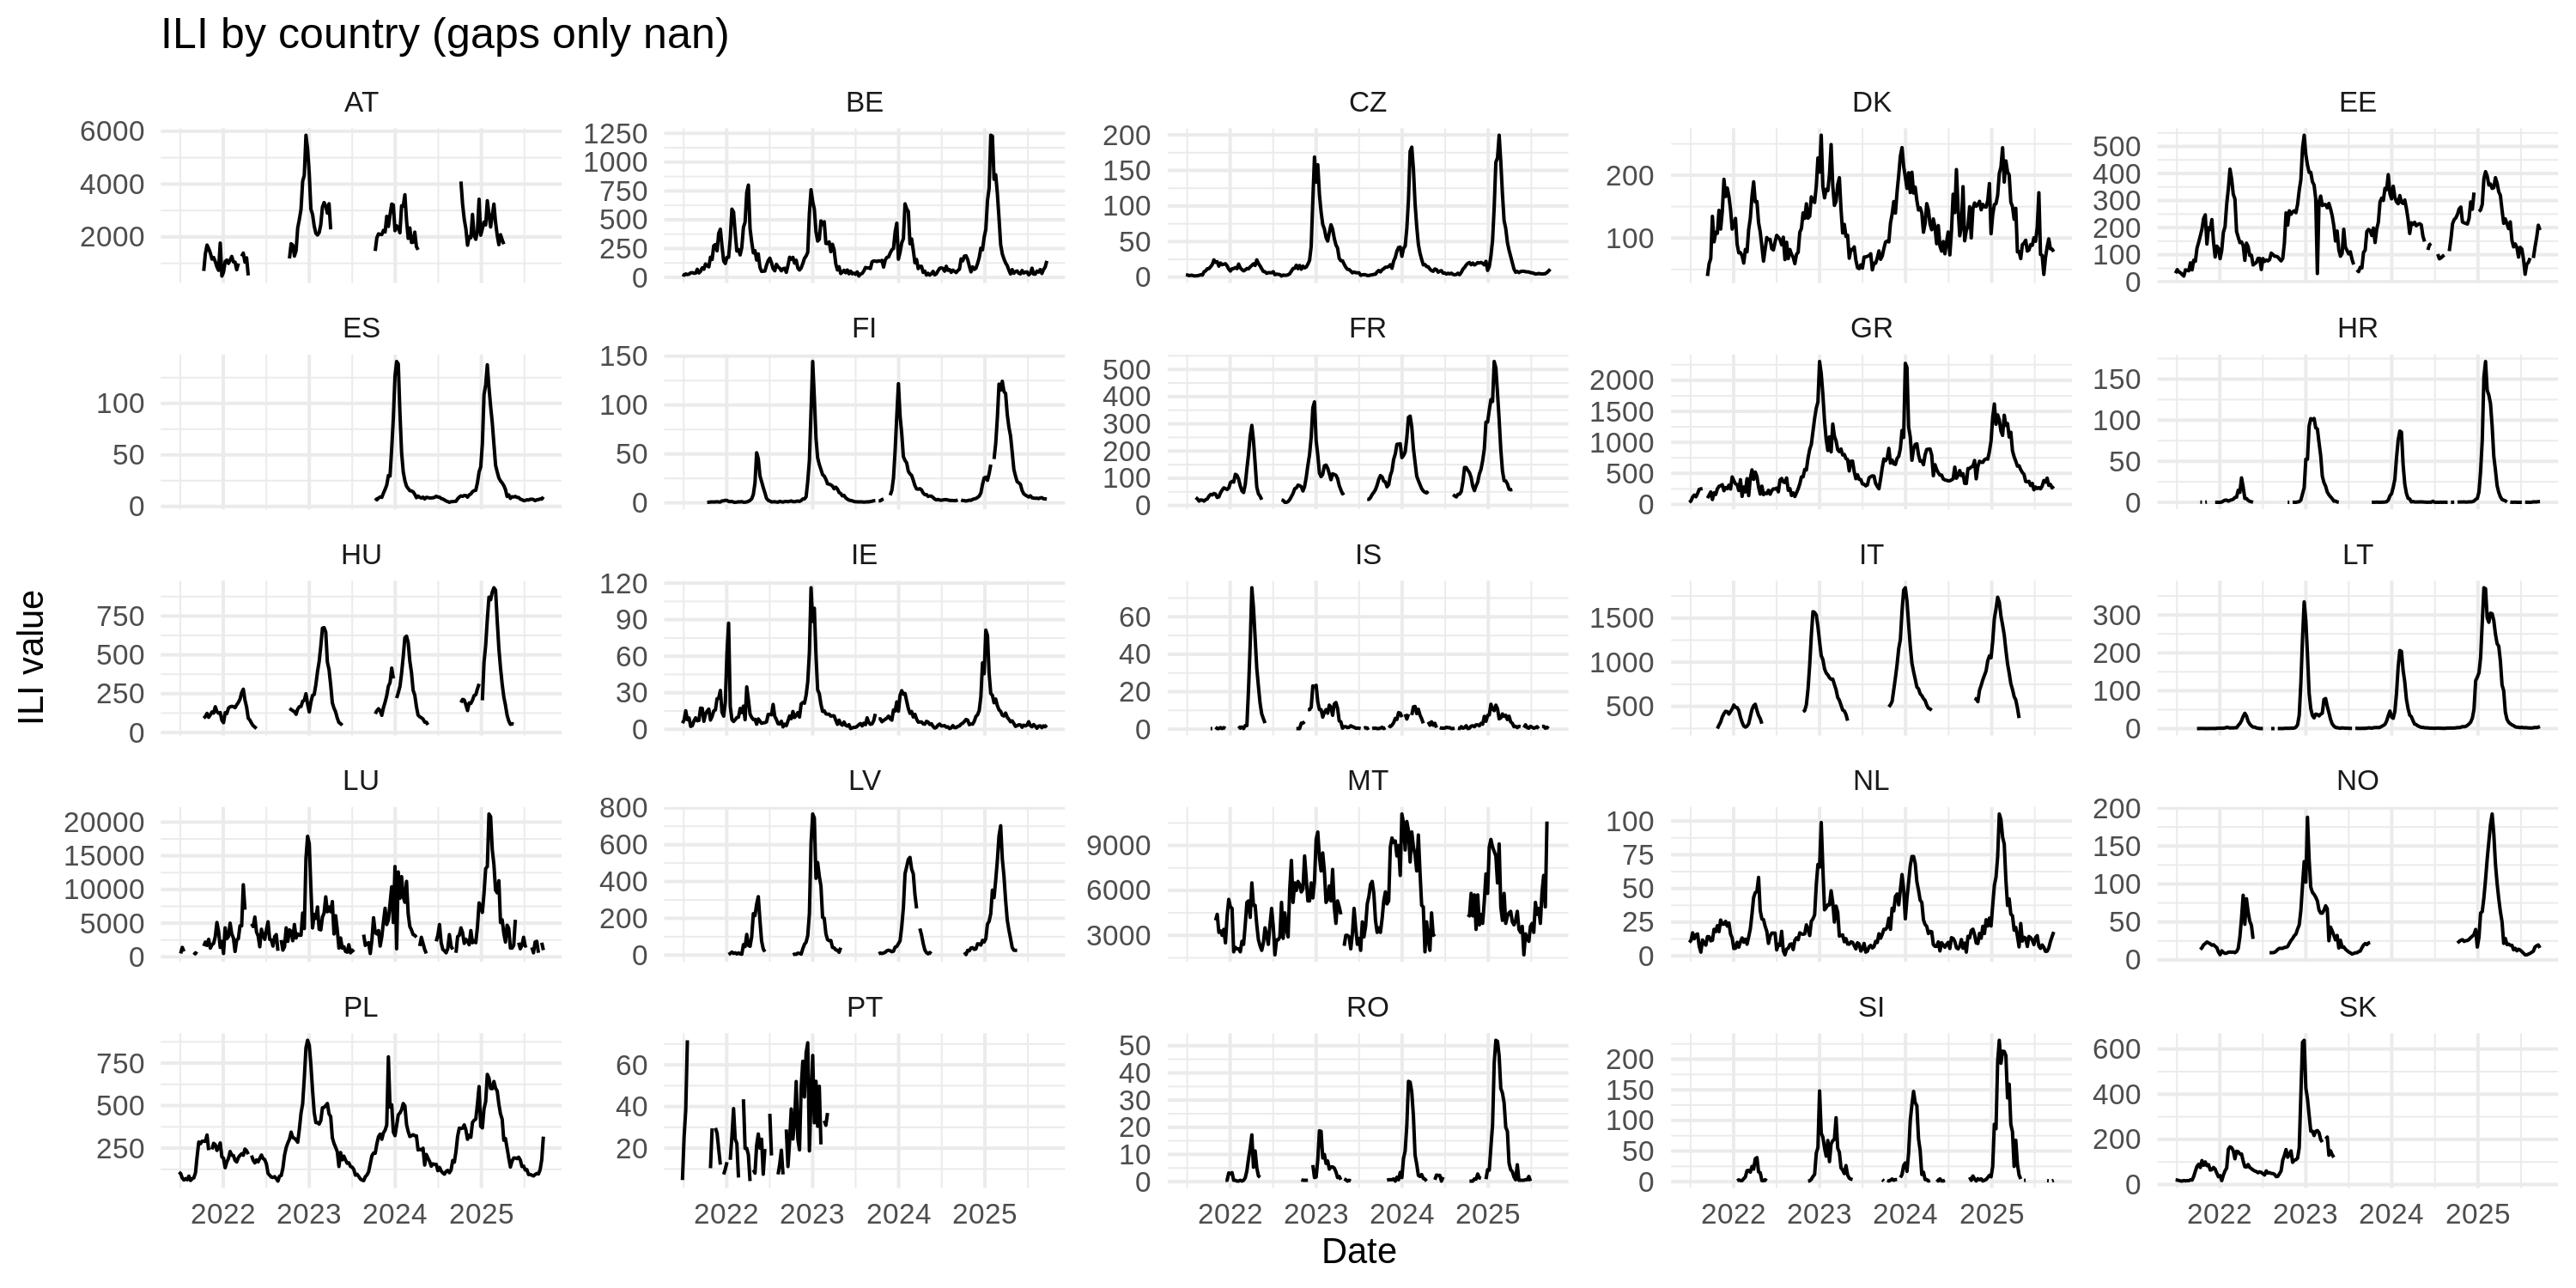

In [10]:
ili_prep <- ili_data0 %>%
  group_by(location_name) %>%
  complete(date = seq.Date(min(date), max(date), by = "week")) %>%
  mutate(value = ifelse(value == 0, NA, value))  %>%
  arrange(location_name, date) %>%
  ungroup()

options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 150)

ggplot(ili_prep, aes(x = date, y = value)) +
  geom_line(na.rm = FALSE) +
  facet_wrap(~ location_name, scales = "free_y") +
  labs(title = "ILI by country (gaps only nan)", x = "Date", y = "ILI value") +
  theme_minimal(base_size=20)

In [11]:
ili_prep2 <- ili_data0 %>%
  group_by(location_name) %>%
  complete(date = seq.Date(min(date), max(date), by = "week")) %>%
  mutate(sus = .env$mark_runs(value, k = 4, combine = TRUE),
         sus = ifelse(is.na(sus), FALSE, sus),
         value_clean = ifelse(sus, NA_real_, value))

Warning message:
“Removed 430 rows containing missing values or values outside the scale range
(`geom_point()`).”


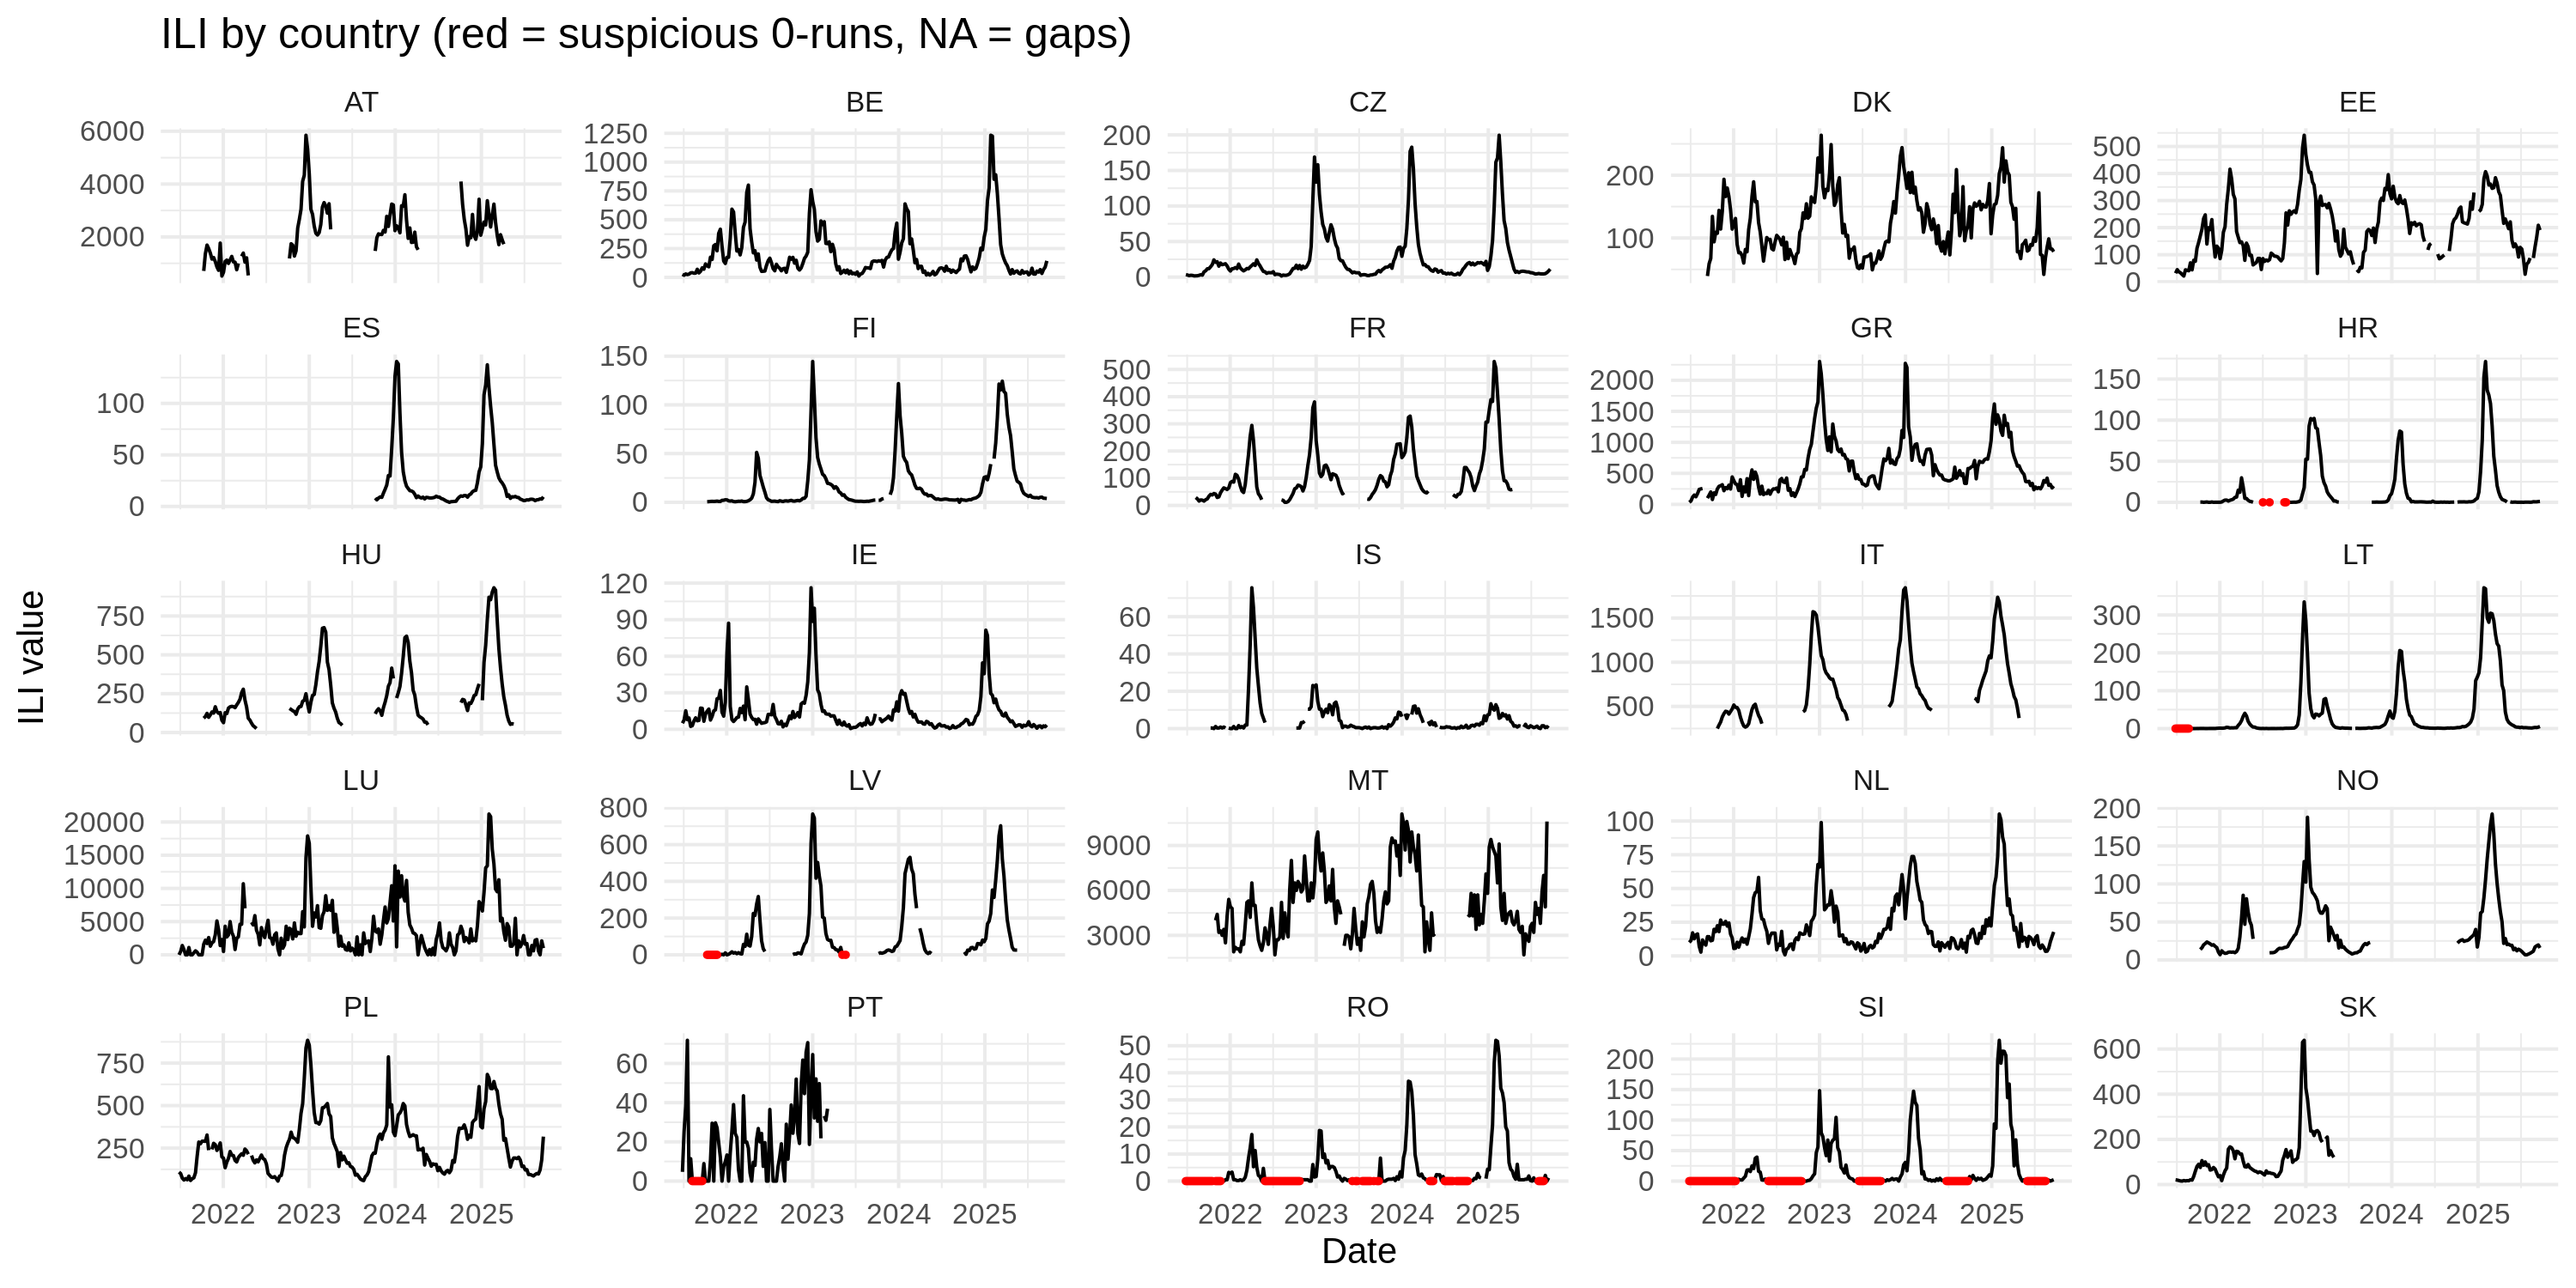

In [12]:
ggplot(ili_prep2, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +
  geom_point(data = subset(ili_prep2, sus), aes(y = value), colour = "red", size = 1) +
  facet_wrap(~ location_name, scales = "free_y") +
  labs(title = "ILI by country (red = suspicious 0-runs, NA = gaps)",
       x = "Date", y = "ILI value") +
  theme_minimal(base_size = 20)

Warning message:
“Removed 430 rows containing missing values or values outside the scale range
(`geom_point()`).”


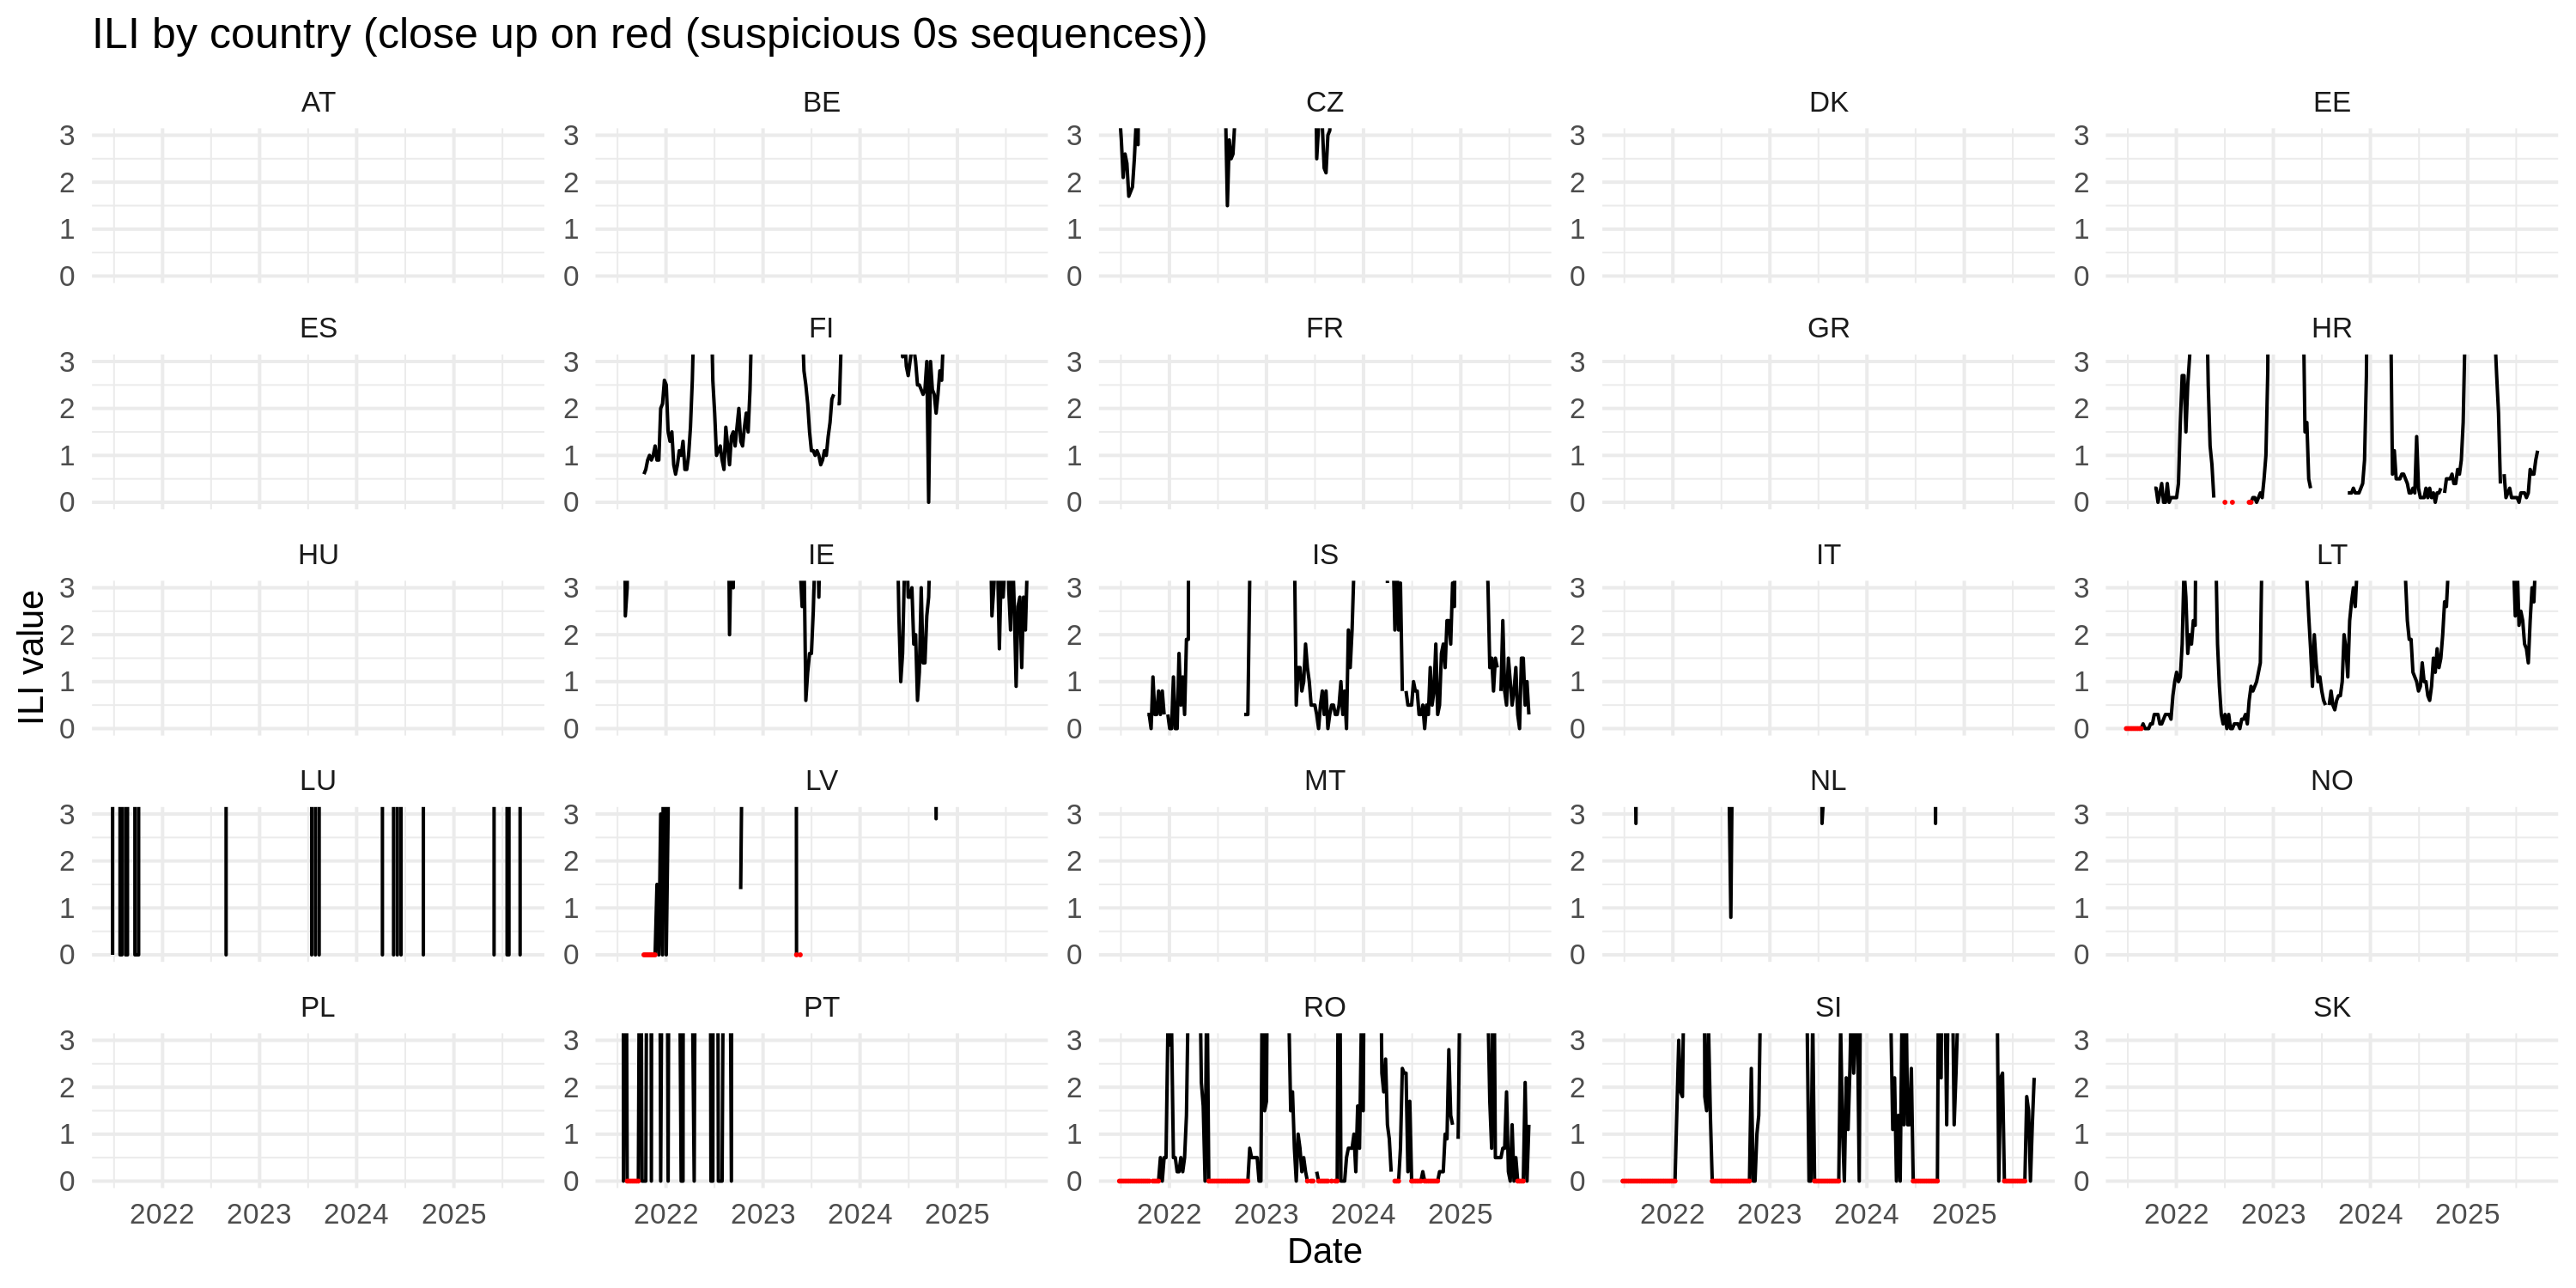

In [13]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 150)

ggplot(ili_prep2, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +
  geom_point(data = subset(ili_prep2, sus), aes(y = value), colour = "red", size = 0.1) +
  facet_wrap(~ location_name, scales = "free_y") +
  coord_cartesian(ylim = c(0, 3)) +
  labs(title = "ILI by country (close up on red (suspicious 0s sequences))",
       x = "Date", y = "ILI value") +
  theme_minimal(base_size = 20)

### Deleting some countries : PT, SK, NO, ES (for now), and take first flu season is the 2022 - 2023 season

In [14]:
ili_data_filt1 <- ili_prep2 %>% filter(!location_name %in% c("PT", "SK", "NO", "ES"), date >= ymd("2022-09-30"))

## Cutting based on GAP

In [15]:
## based on the sus on the summer period, take the earliest and latest flagged sus time accross all countries

# 1) Use only `sus`
df1 <- ili_data_filt1 %>% mutate(iso_y = isoyear(date))

# 2) All suspicious runs (consecutive sus == TRUE) by country-year
all_runs <- df1 %>%
  arrange(location_name, iso_y, date) %>%
  group_by(location_name, iso_y) %>%
  mutate(run_id = cumsum(coalesce(sus != lag(sus), TRUE))) %>%
  group_by(location_name, iso_y, run_id) %>%
  summarise(
    sus   = first(sus),
    start = first(date),
    end   = last(date),
    .groups = "drop") %>%
  filter(sus)

# 3) Seasonal window filter + clipping
all_runs_season <- all_runs %>%
  mutate(
    win_start = ymd(paste0(iso_y, "-03-30")),
    win_end   = ymd(paste0(iso_y, "-11-30")),
    overlaps  = (end >= win_start) & (start <= win_end)
  ) %>%
  filter(overlaps) %>%
  mutate(
    start_clip = pmax(start, win_start),
    end_clip   = pmin(end,   win_end),
    start_w    = isoweek(start_clip),
    end_w      = isoweek(end_clip)
  )

# 4) Global consensus
global_consensus <- all_runs_season %>%
  summarise(
    start_w_consensus = min(start_w, na.rm = TRUE),
    end_w_consensus   = max(end_w,   na.rm = TRUE)
  )

# 5) Year-specific consensus
year_consensus <- all_runs_season %>%
  group_by(iso_y) %>%
  summarise(
    start_w_consensus = min(start_w, na.rm = TRUE),
    end_w_consensus   = max(end_w,   na.rm = TRUE),
    .groups = "drop"
  )

In [16]:
year_consensus <- df1 %>%
  mutate(
    win_start = ymd(paste0(iso_y, "-03-30")),
    win_end   = ymd(paste0(iso_y, "-11-30")),
    in_win    = date >= win_start & date <= win_end
  ) %>%
  filter(sus, in_win) %>%
  group_by(iso_y) %>%
  summarise(
    earliest_date = min(date, na.rm = TRUE),
    latest_date   = max(date, na.rm = TRUE),
    earliest_week = isoweek(earliest_date),
    latest_week   = isoweek(latest_date),
    .groups = "drop"
  )

year_consensus

iso_y earliest_date latest_date earliest_week latest_week
1 2022  2022-10-02    2022-10-23  39            42         
2 2023  2023-04-09    2023-10-15  14            41         
3 2024  2024-04-14    2024-10-13  15            41         
4 2025  2025-06-01    2025-08-24  22            34

In [17]:
# you already have `year_consensus` with earliest_week / latest_week
global_consensus <- year_consensus %>%
  summarise(
    earliest_week = min(earliest_week, na.rm = TRUE),
    latest_week   = max(latest_week,   na.rm = TRUE)
  )

global_consensus

earliest_week latest_week
1 14            42

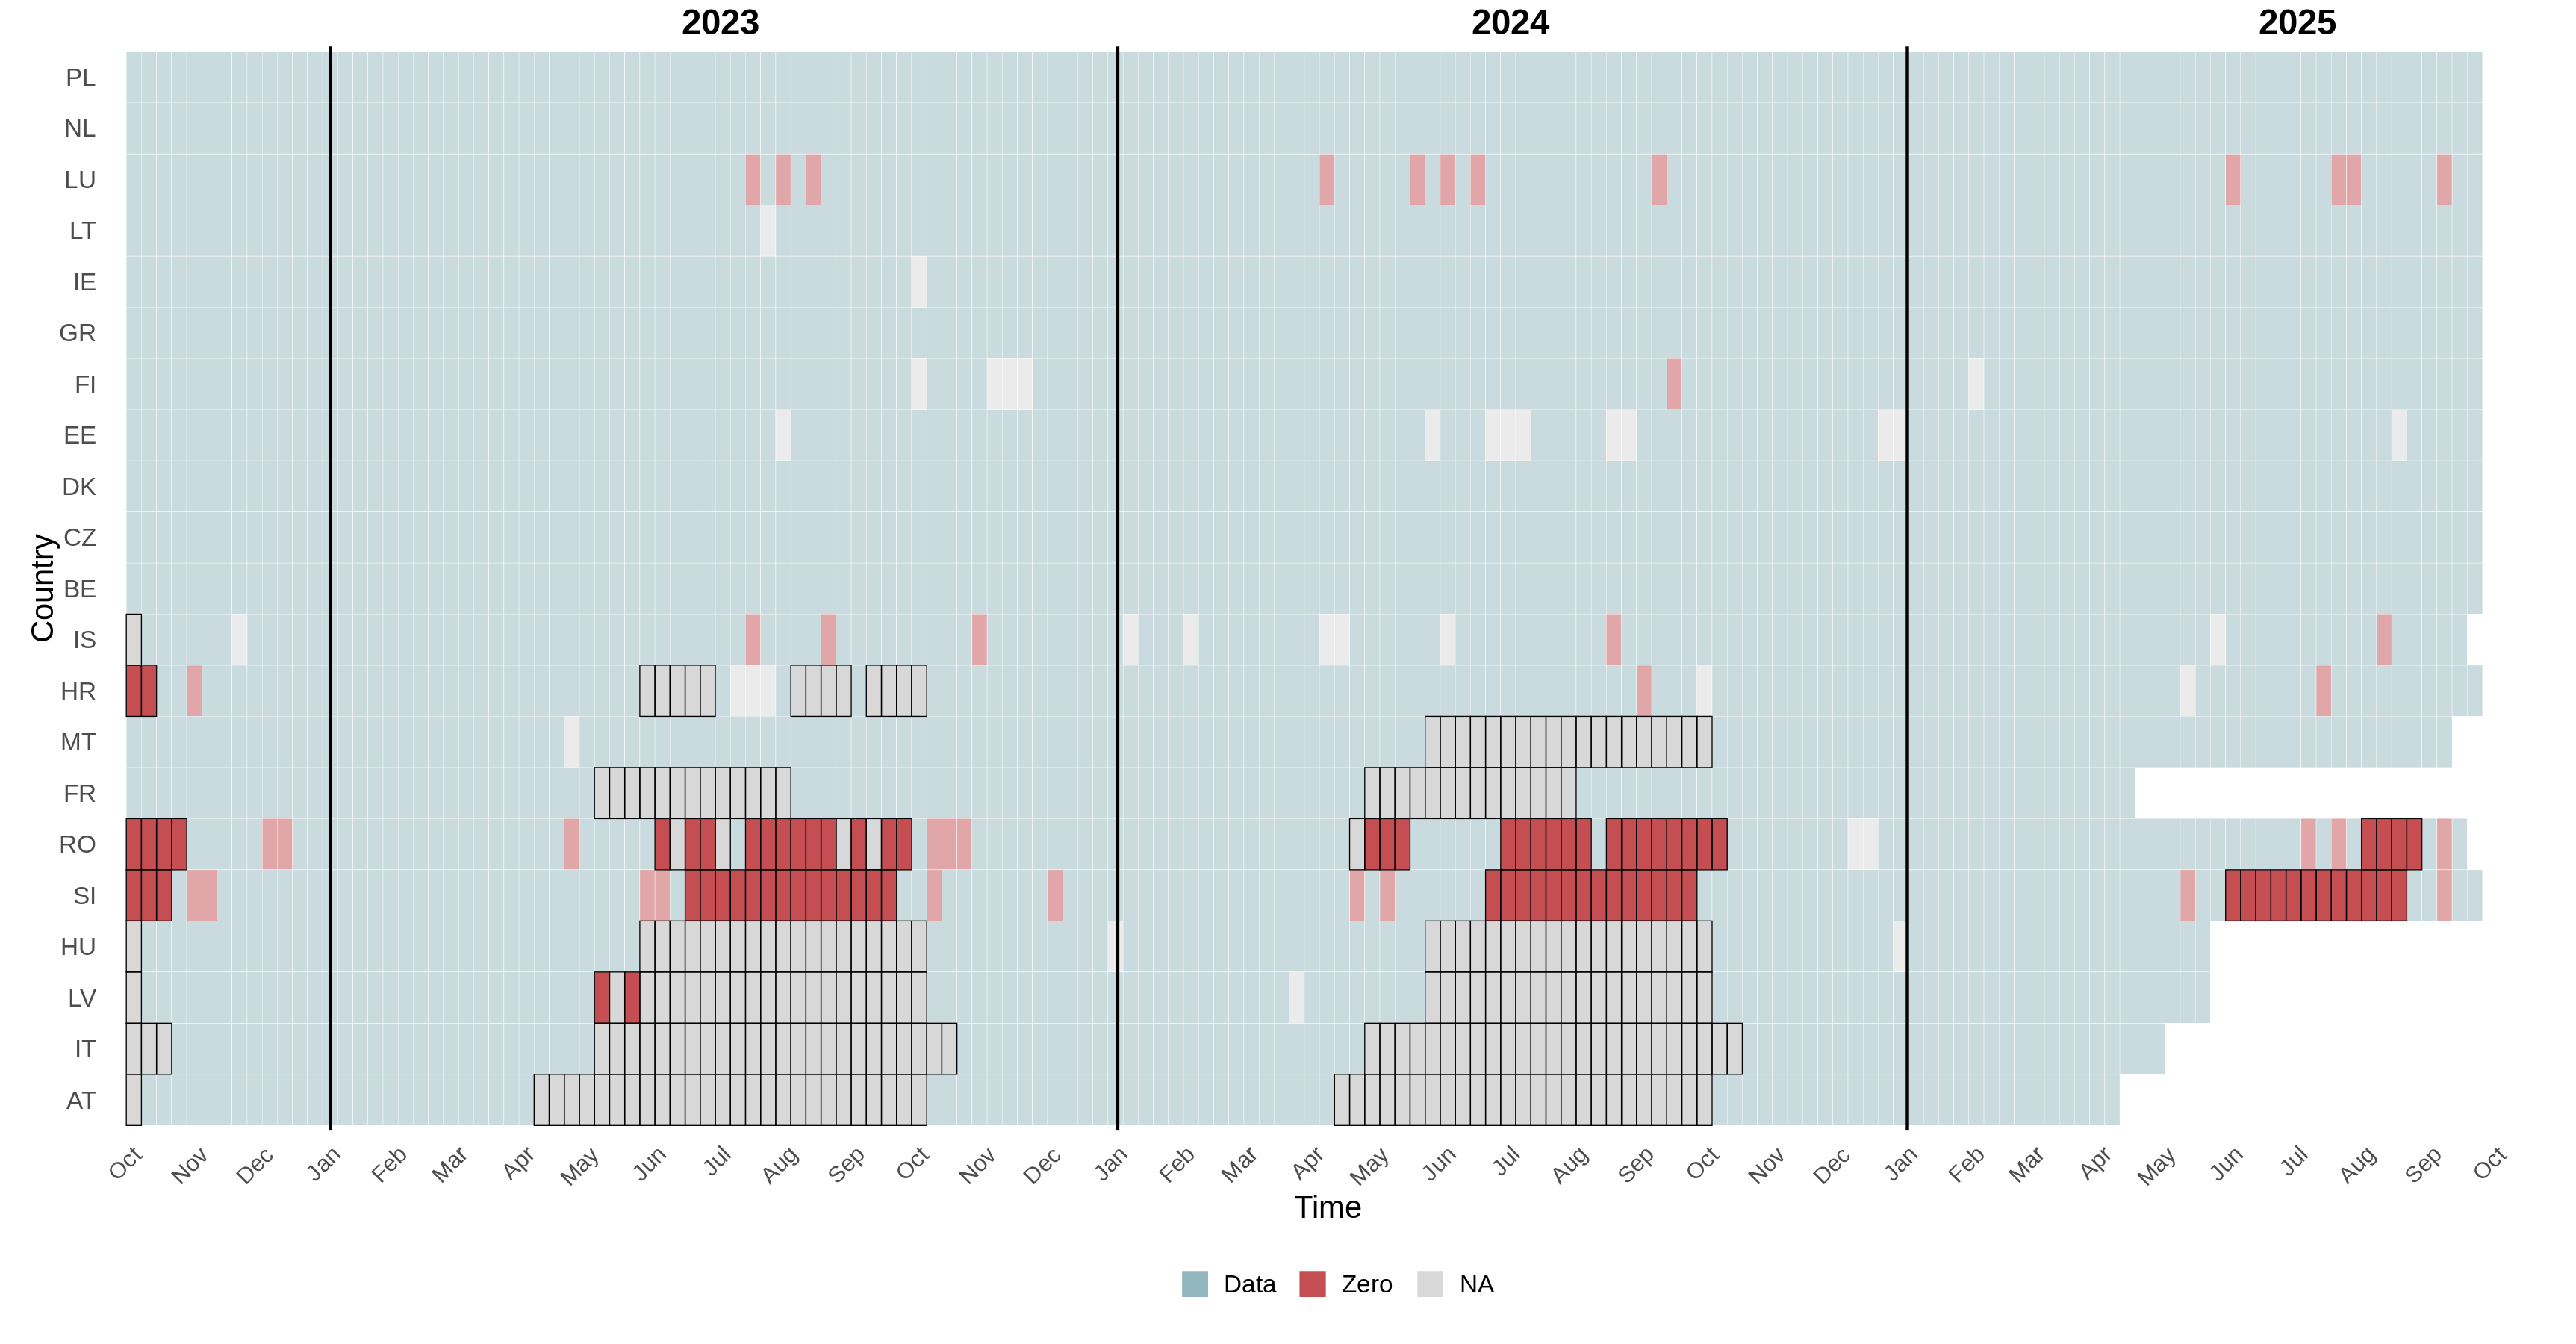

In [121]:
# Categorize data as "ZERO", "NA", and "DATA", highlight only the sus
plot_df <- ili_data_filt1 %>%
  mutate(state = case_when(
      is.na(value)  ~ "NA",
      value == 0  ~ "ZERO",
      TRUE ~ "DATA"),
    highlight = sus & state != "DATA"
  )

marked_df <- plot_df # to be saved later

# Order the display of the time-series based on the amount of sus
plot_df <- plot_df %>%
  group_by(location_name) %>%
  mutate(perc_highlight = mean(highlight, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(location_name = fct_reorder(location_name, perc_highlight, .desc = TRUE))

# Take the year
xmin <- min(plot_df$date, na.rm = TRUE)
xmax <- max(plot_df$date, na.rm = TRUE)
year_lines <- seq(floor_date(xmin, "year"), ceiling_date(xmax, "year"), by = "1 year")

options(repr.plot.width = 23, repr.plot.height = 12, repr.plot.res = 150)
# 4) Plot
ggplot(plot_df, aes(date, location_name)) +
  geom_tile(aes(fill = state, alpha = ifelse(highlight, "high", "low")), color = "white", linewidth = 0.1) +
  scale_fill_manual(
    values = c("DATA" = "#93B7BE", "ZERO" = "#C44E52", "NA" = "#D8D8D8"),
    breaks = c("DATA","ZERO","NA"), labels = c("Data","Zero","NA"), drop = FALSE  ) +
  scale_alpha_manual(values = c(low = 0.5, high = 1), guide = "none") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b",
               expand = expansion(mult = c(0.01, 0.03))) +
  geom_vline(xintercept = year_lines, color = "black", linewidth = 1) +
  annotate("text",
           x = year_lines + months(6), y = Inf, vjust = -0.5,
           label = year(year_lines), fontface = "bold", size = 8) +
  labs(x = "Time", y = "Country", fill = "") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
    axis.text.y = element_text(size = 16),
    legend.position = "bottom",
    plot.margin = margin(t = 30, r = 20, b = 20, l = 20)
  ) +
  geom_tile(data = subset(plot_df, highlight), aes(date, location_name), fill = NA, color = "black", linewidth = 0.3) +
  coord_cartesian(xlim = range(plot_df$date, na.rm = TRUE), clip = "off")


In [122]:
w_start <- global_consensus$earliest_week[[1]]
w_end   <- global_consensus$latest_week[[1]]

yrs <- seq(2022, 2025)

cut_lines <- tibble(
  yr    = yrs,
  start = ISOweek2date(sprintf("%d-W%02d-1", yr, w_start)),
  end   = ISOweek2date(sprintf("%d-W%02d-7", yr, w_end))
) %>%
  pivot_longer(c(start, end), names_to = "which", values_to = "x")


In [123]:
cut_lines

yr   which x         
1 2022 start 2022-04-04
2 2022 end   2022-10-23
3 2023 start 2023-04-03
4 2023 end   2023-10-22
5 2024 start 2024-04-01
6 2024 end   2024-10-20
7 2025 start 2025-03-31
8 2025 end   2025-10-19

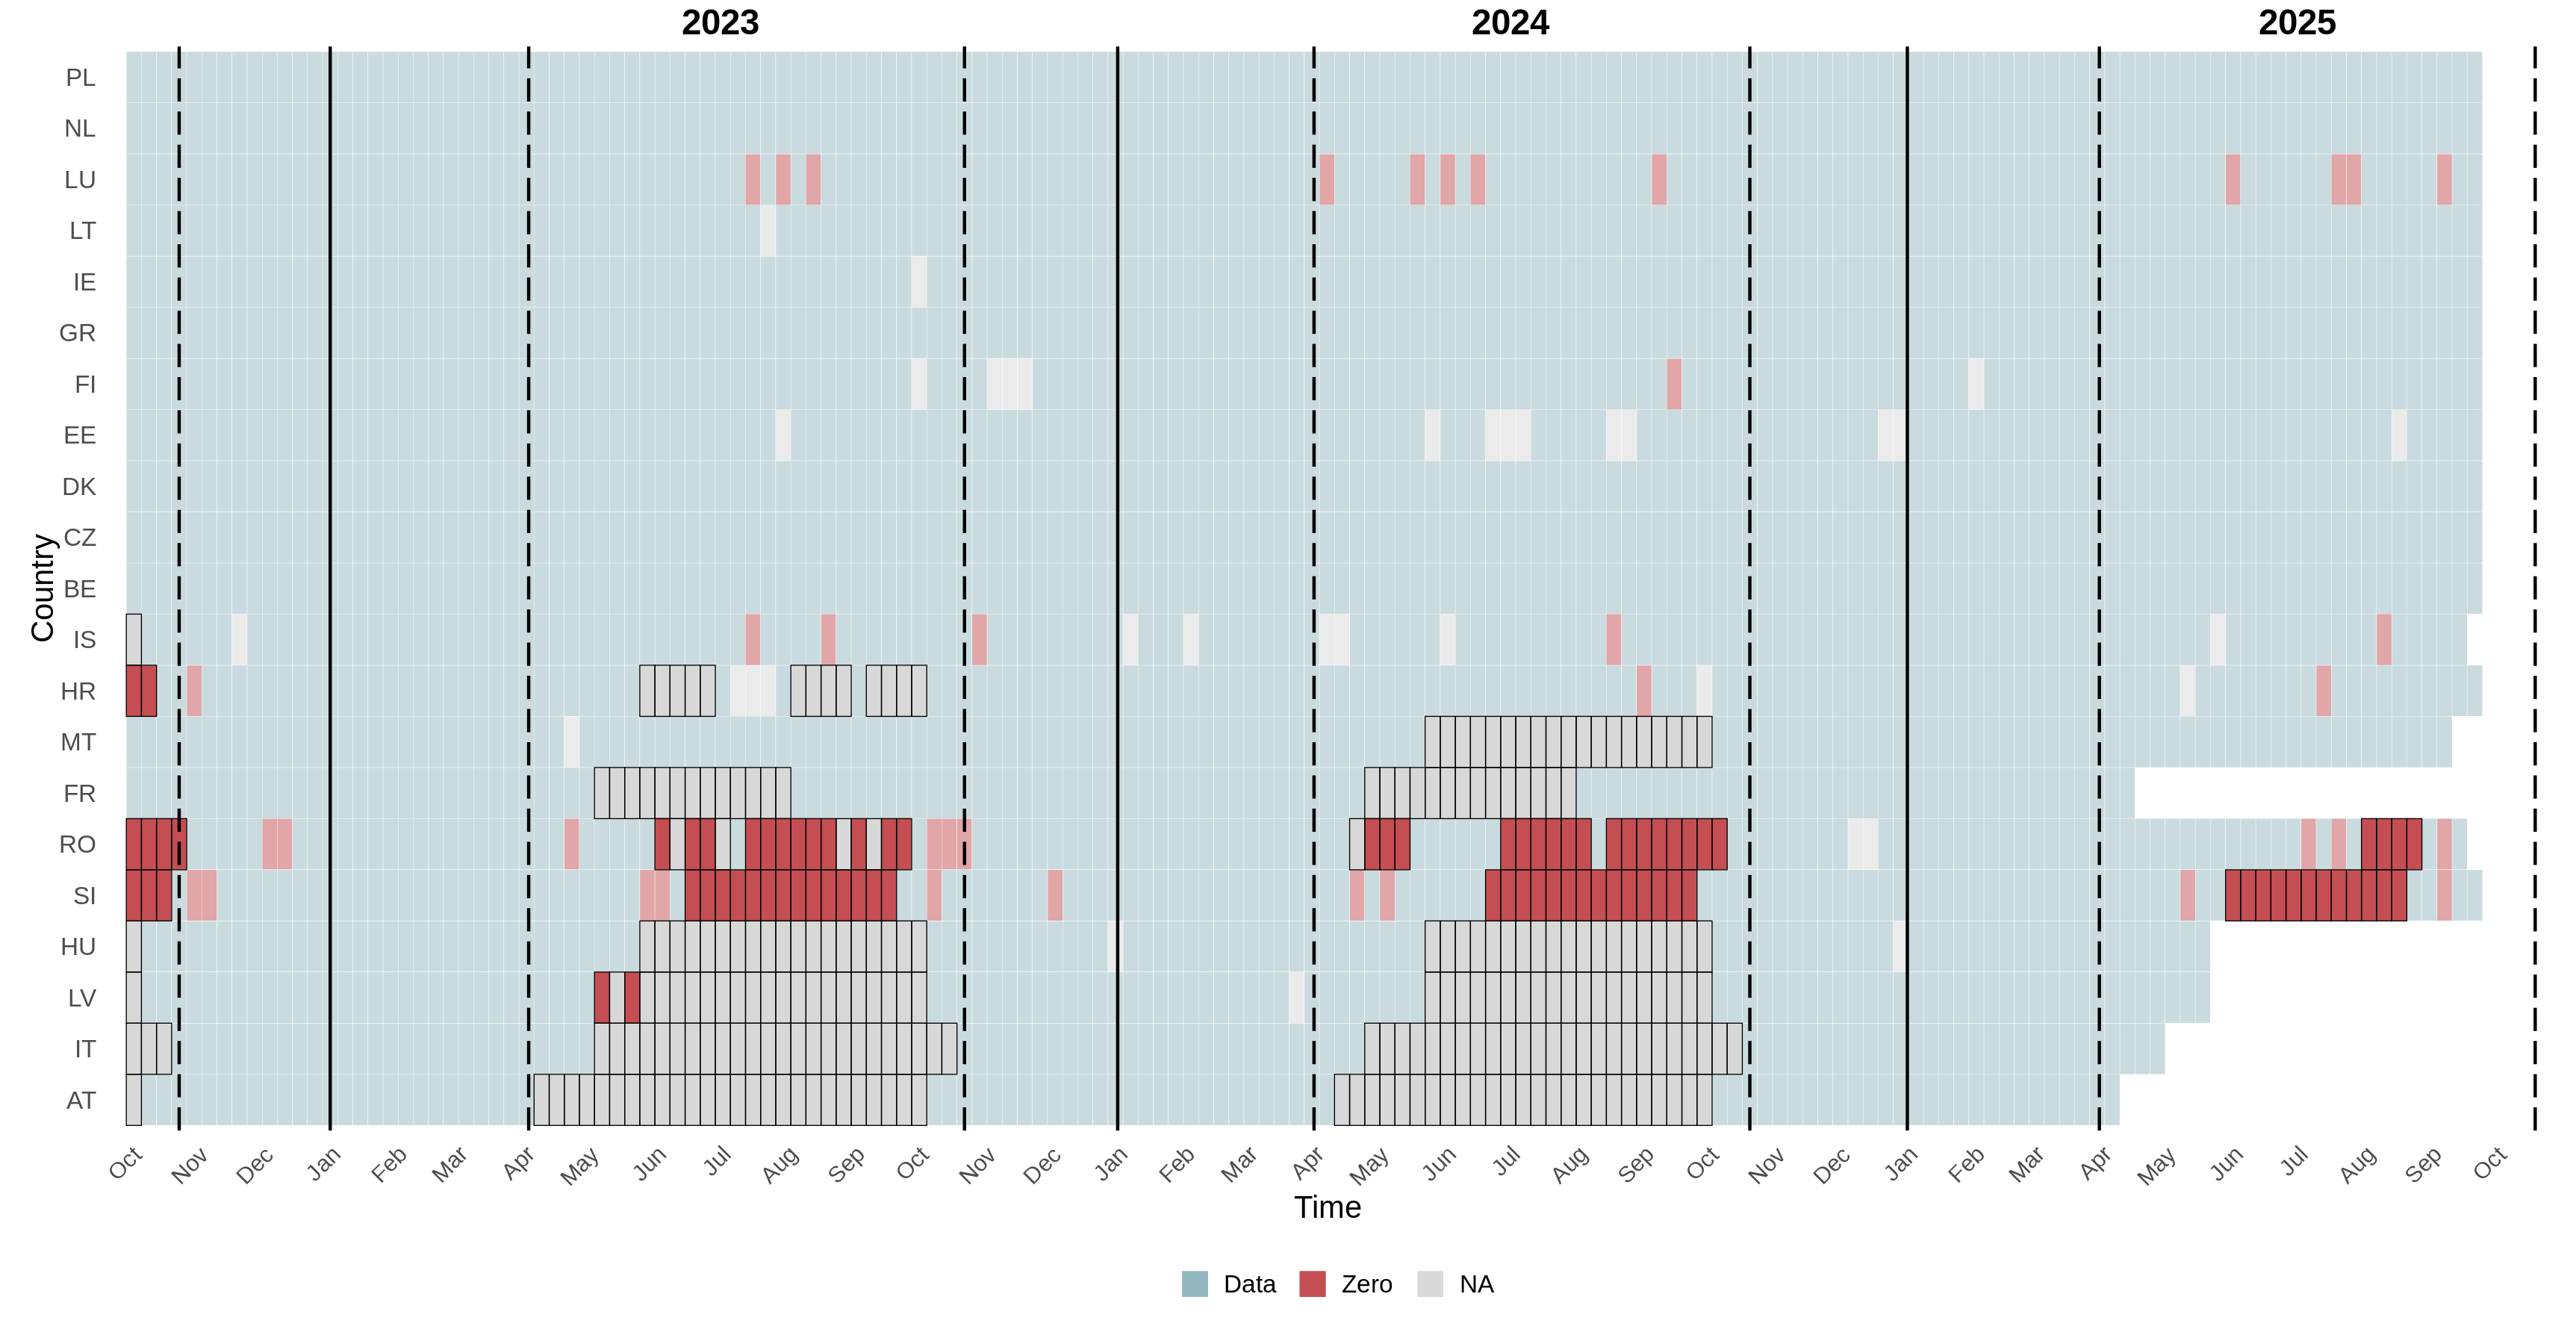

In [124]:
# Categorize data as "ZERO", "NA", and "DATA", highlight only the sus
plot_df <- ili_data_filt1 %>%
  mutate(state = case_when(
      is.na(value)  ~ "NA",
      value == 0  ~ "ZERO",
      TRUE ~ "DATA"),
    highlight = sus & state != "DATA"
  )


# Order the display of the time-series based on the amount of sus
plot_df <- plot_df %>%
  group_by(location_name) %>%
  mutate(perc_highlight = mean(highlight, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(location_name = fct_reorder(location_name, perc_highlight, .desc = TRUE))

# Take the year
xmin <- min(plot_df$date, na.rm = TRUE)
xmax <- max(plot_df$date, na.rm = TRUE)
year_lines <- seq(floor_date(xmin, "year"), ceiling_date(xmax, "year"), by = "1 year")

options(repr.plot.width = 23, repr.plot.height = 12, repr.plot.res = 150)
# 4) Plot
ggplot(plot_df, aes(date, location_name)) +
  geom_tile(aes(fill = state, alpha = ifelse(highlight, "high", "low")), color = "white", linewidth = 0.1) +
  scale_fill_manual(
    values = c("DATA" = "#93B7BE", "ZERO" = "#C44E52", "NA" = "#D8D8D8"),
    breaks = c("DATA","ZERO","NA"), labels = c("Data","Zero","NA"), drop = FALSE  ) +
  scale_alpha_manual(values = c(low = 0.5, high = 1), guide = "none") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b",
               expand = expansion(mult = c(0.01, 0.03))) +
  geom_vline(xintercept = year_lines, color = "black", linewidth = 1) +
  geom_vline(data = cut_lines, aes(xintercept = x),
           linetype = "longdash", linewidth = 1, color = "black") +

  annotate("text",
           x = year_lines + months(6), y = Inf, vjust = -0.5,
           label = year(year_lines), fontface = "bold", size = 8) +
  labs(x = "Time", y = "Country", fill = "") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
    axis.text.y = element_text(size = 16),
    legend.position = "bottom",
    plot.margin = margin(t = 30, r = 20, b = 20, l = 20)
  ) +
  geom_tile(data = subset(plot_df, highlight), aes(date, location_name), fill = NA, color = "black", linewidth = 0.3) +
  coord_cartesian(xlim = range(plot_df$date, na.rm = TRUE), clip = "off")


In [125]:
ili_data_filt1 <- ili_data_filt1 %>%
  mutate(iso_w = isoweek(date), summer_cut = between(iso_w, w_start, w_end))

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


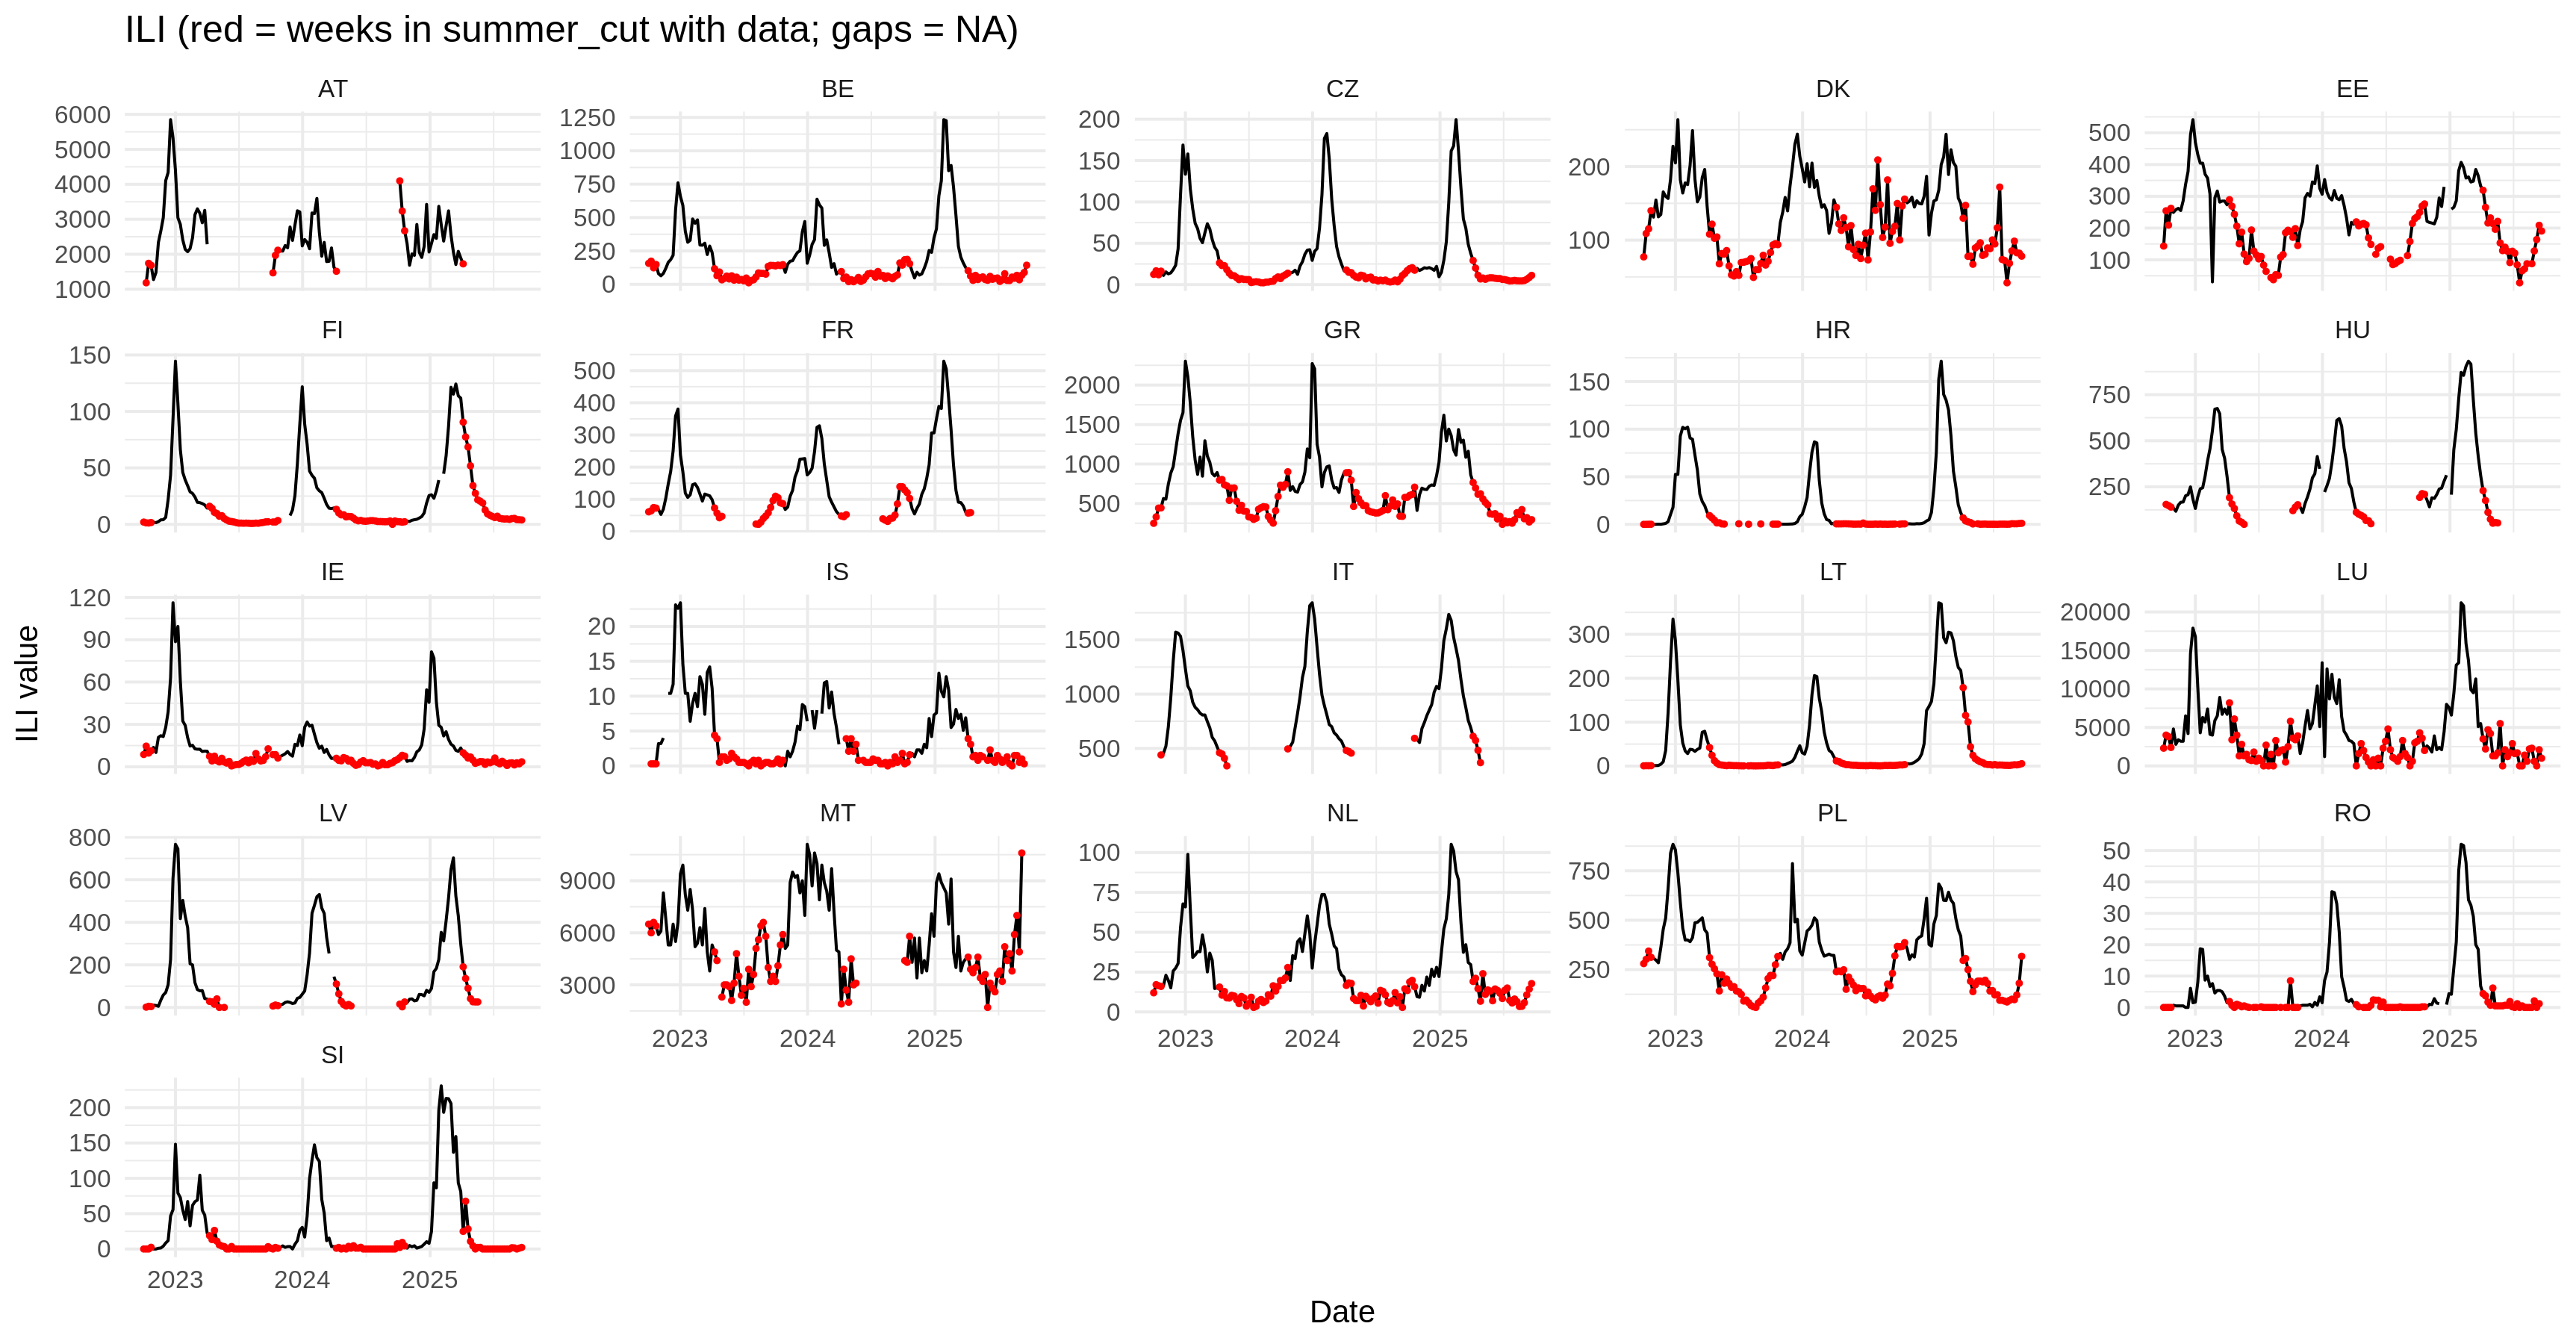

In [23]:
ggplot(ili_data_filt1, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +

  geom_point(data = ili_data_filt1 %>% filter(summer_cut, !is.na(value)), aes(y = value),  colour = "red", size = 1) +
  facet_wrap(~ location_name, scales = "free_y") +

  labs(
    title = "ILI (red = weeks in summer_cut with data; gaps = NA)",
    x = "Date", y = "ILI value") +

  theme_minimal(base_size = 20)


In [24]:
# Cut the summer period
keep <- ili_data_filt1 %>%
  filter(!summer_cut) %>%
  arrange(location_name, date) %>%
  group_by(location_name) %>%
  mutate(t_idx = row_number(),  year  = year(date)) %>%
  ungroup()

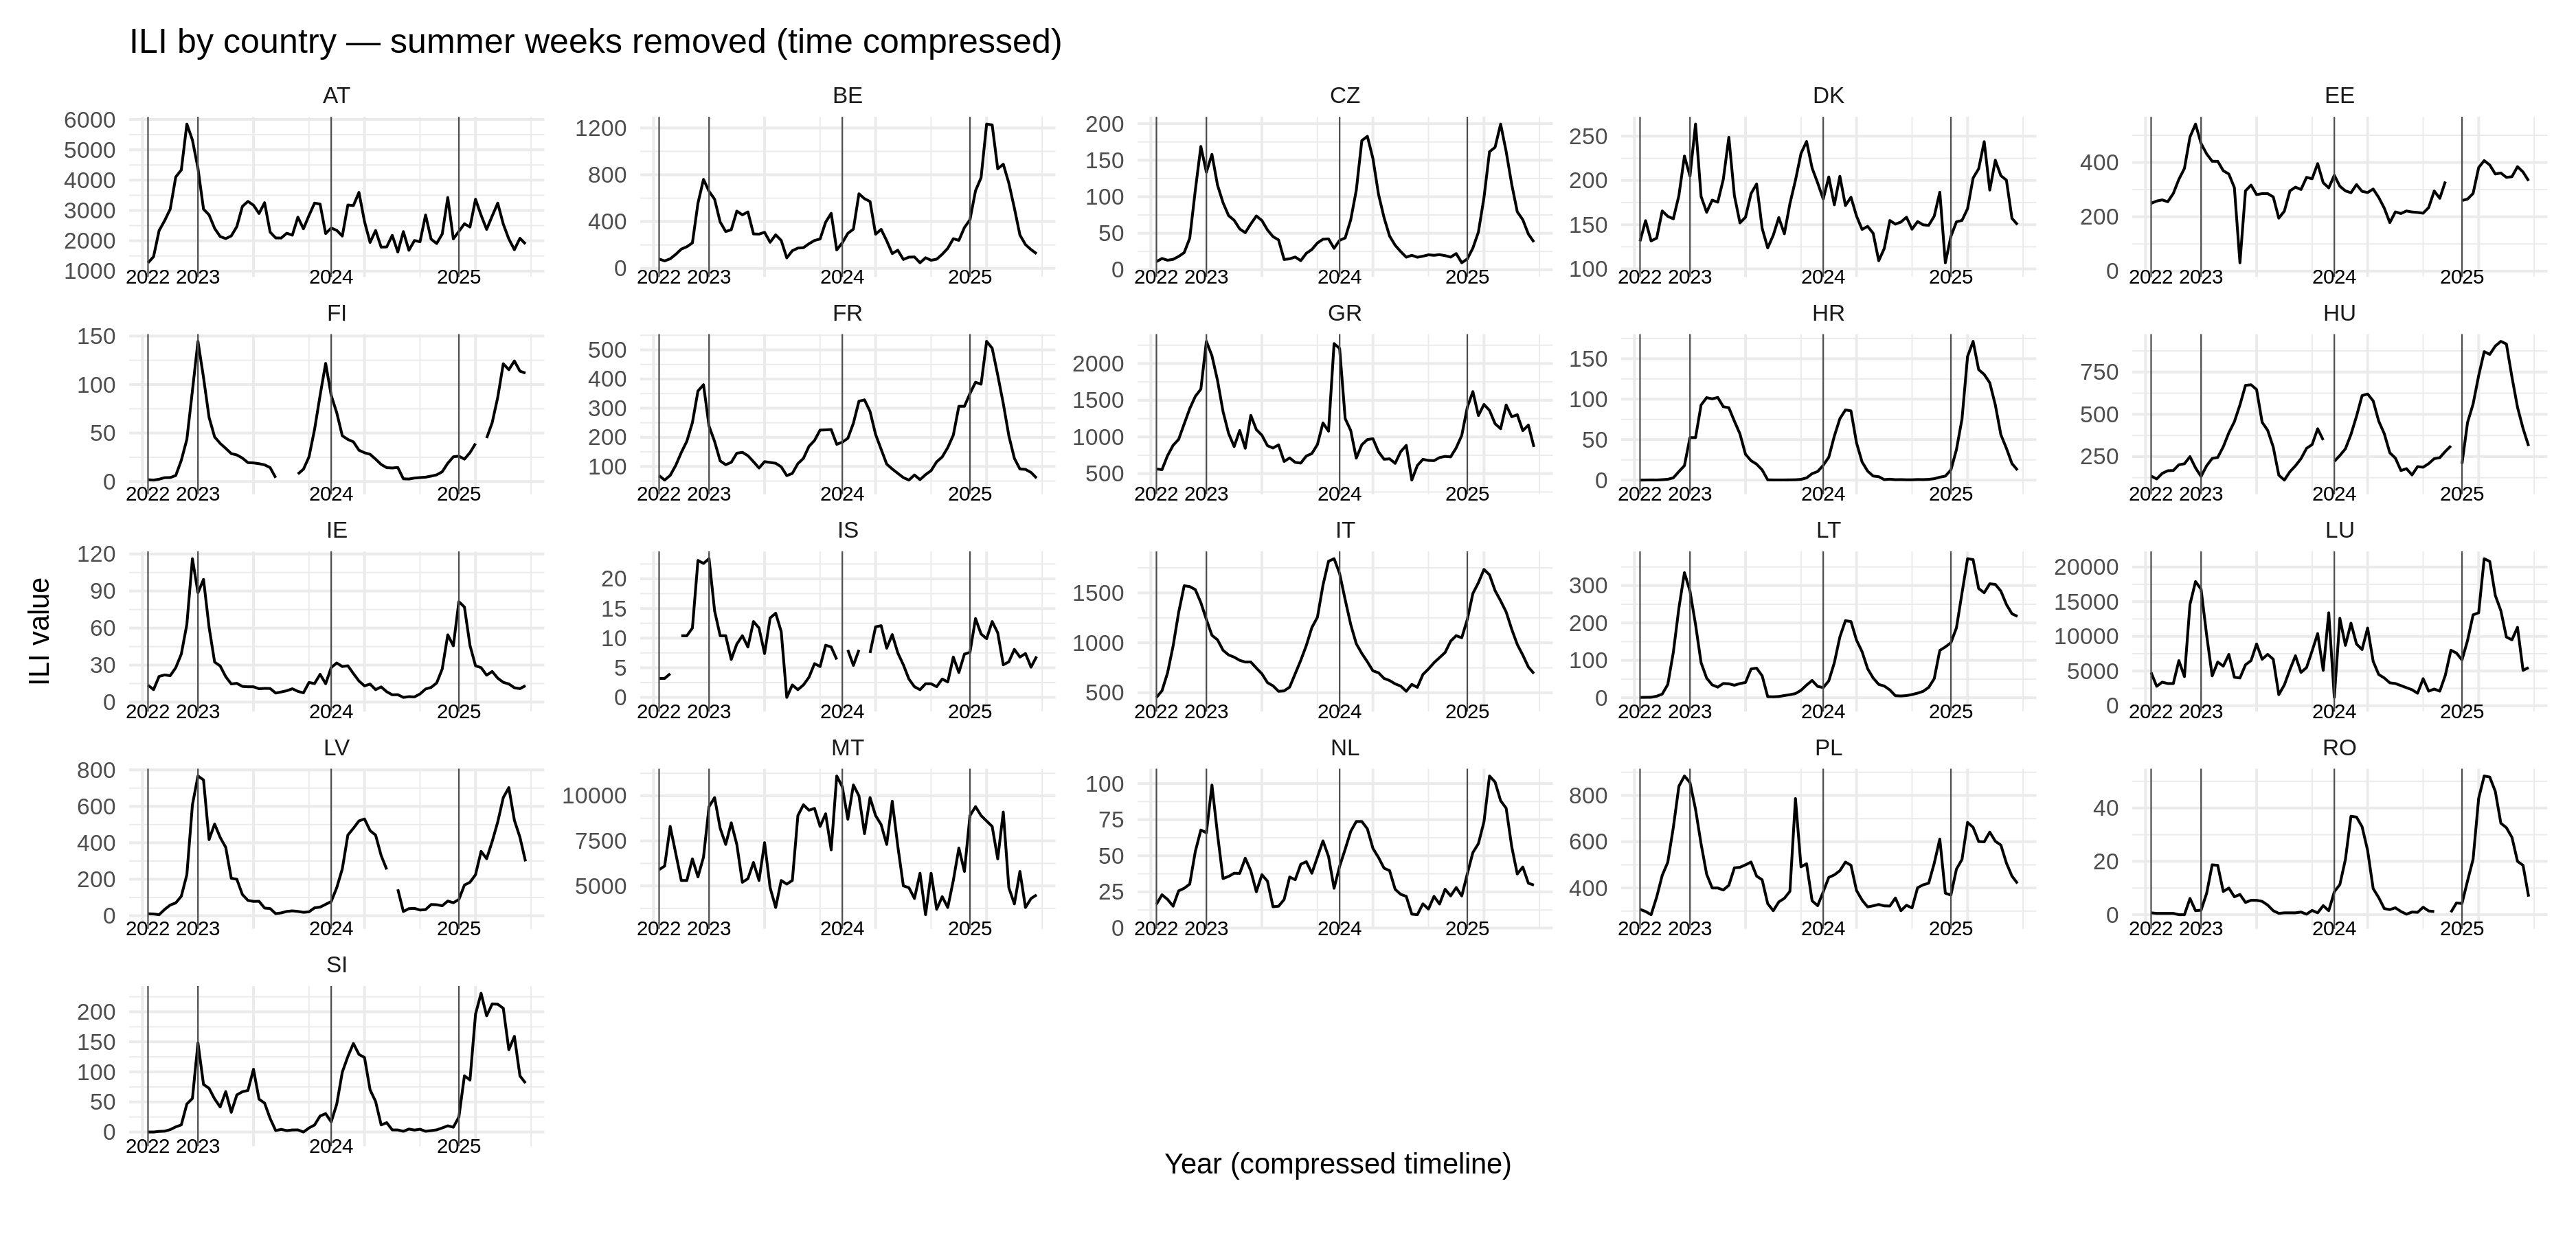

In [74]:
year_ticks <- keep %>%
  arrange(location_name, t_idx) %>%
  group_by(location_name, yr = year(date)) %>%
  summarise(x = first(t_idx), .groups = "drop")

yrange <- keep %>%
  group_by(location_name) %>%
  summarise(
    ymin = min(value, na.rm = TRUE),
    ymax = max(value, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(ypos = ymin - 0.05 * pmax(1e-6, ymax - ymin))

year_ticks <- year_ticks %>% left_join(yrange, by = "location_name")

options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)
ggplot(keep, aes(x = t_idx, y = value)) +
  geom_line(color = "black", na.rm = FALSE) +
  geom_vline(data = year_ticks, aes(xintercept = x), color = "grey30", linewidth = 0.5) +
  geom_text(data = year_ticks,
            aes(x = x, y = ypos, label = yr),
            inherit.aes = FALSE, size = 5, vjust = 1) +
  facet_wrap(~ location_name, scales = "free_y") +
  labs(title = "ILI by country — summer weeks removed (time compressed)",
       x = "Year (compressed timeline)", y = "ILI value") +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(t = 20, r = 20, b = 40, l = 20)) +
  coord_cartesian(clip = "off")

In [26]:
# Interpolate
ts_clean <- keep %>%
  arrange(location_name, date) %>%
  group_by(location_name) %>%
  mutate(
    sus = ifelse(is.na(sus), FALSE, sus),
    value_masked = ifelse(is.na(value) | (value == 0 & sus), NA_real_, value),
    # linear interpolation
    value_clean = na.approx(value_masked, x = as.numeric(date), na.rm = FALSE)
  ) %>%
  ungroup() %>%
  select(-value_masked)

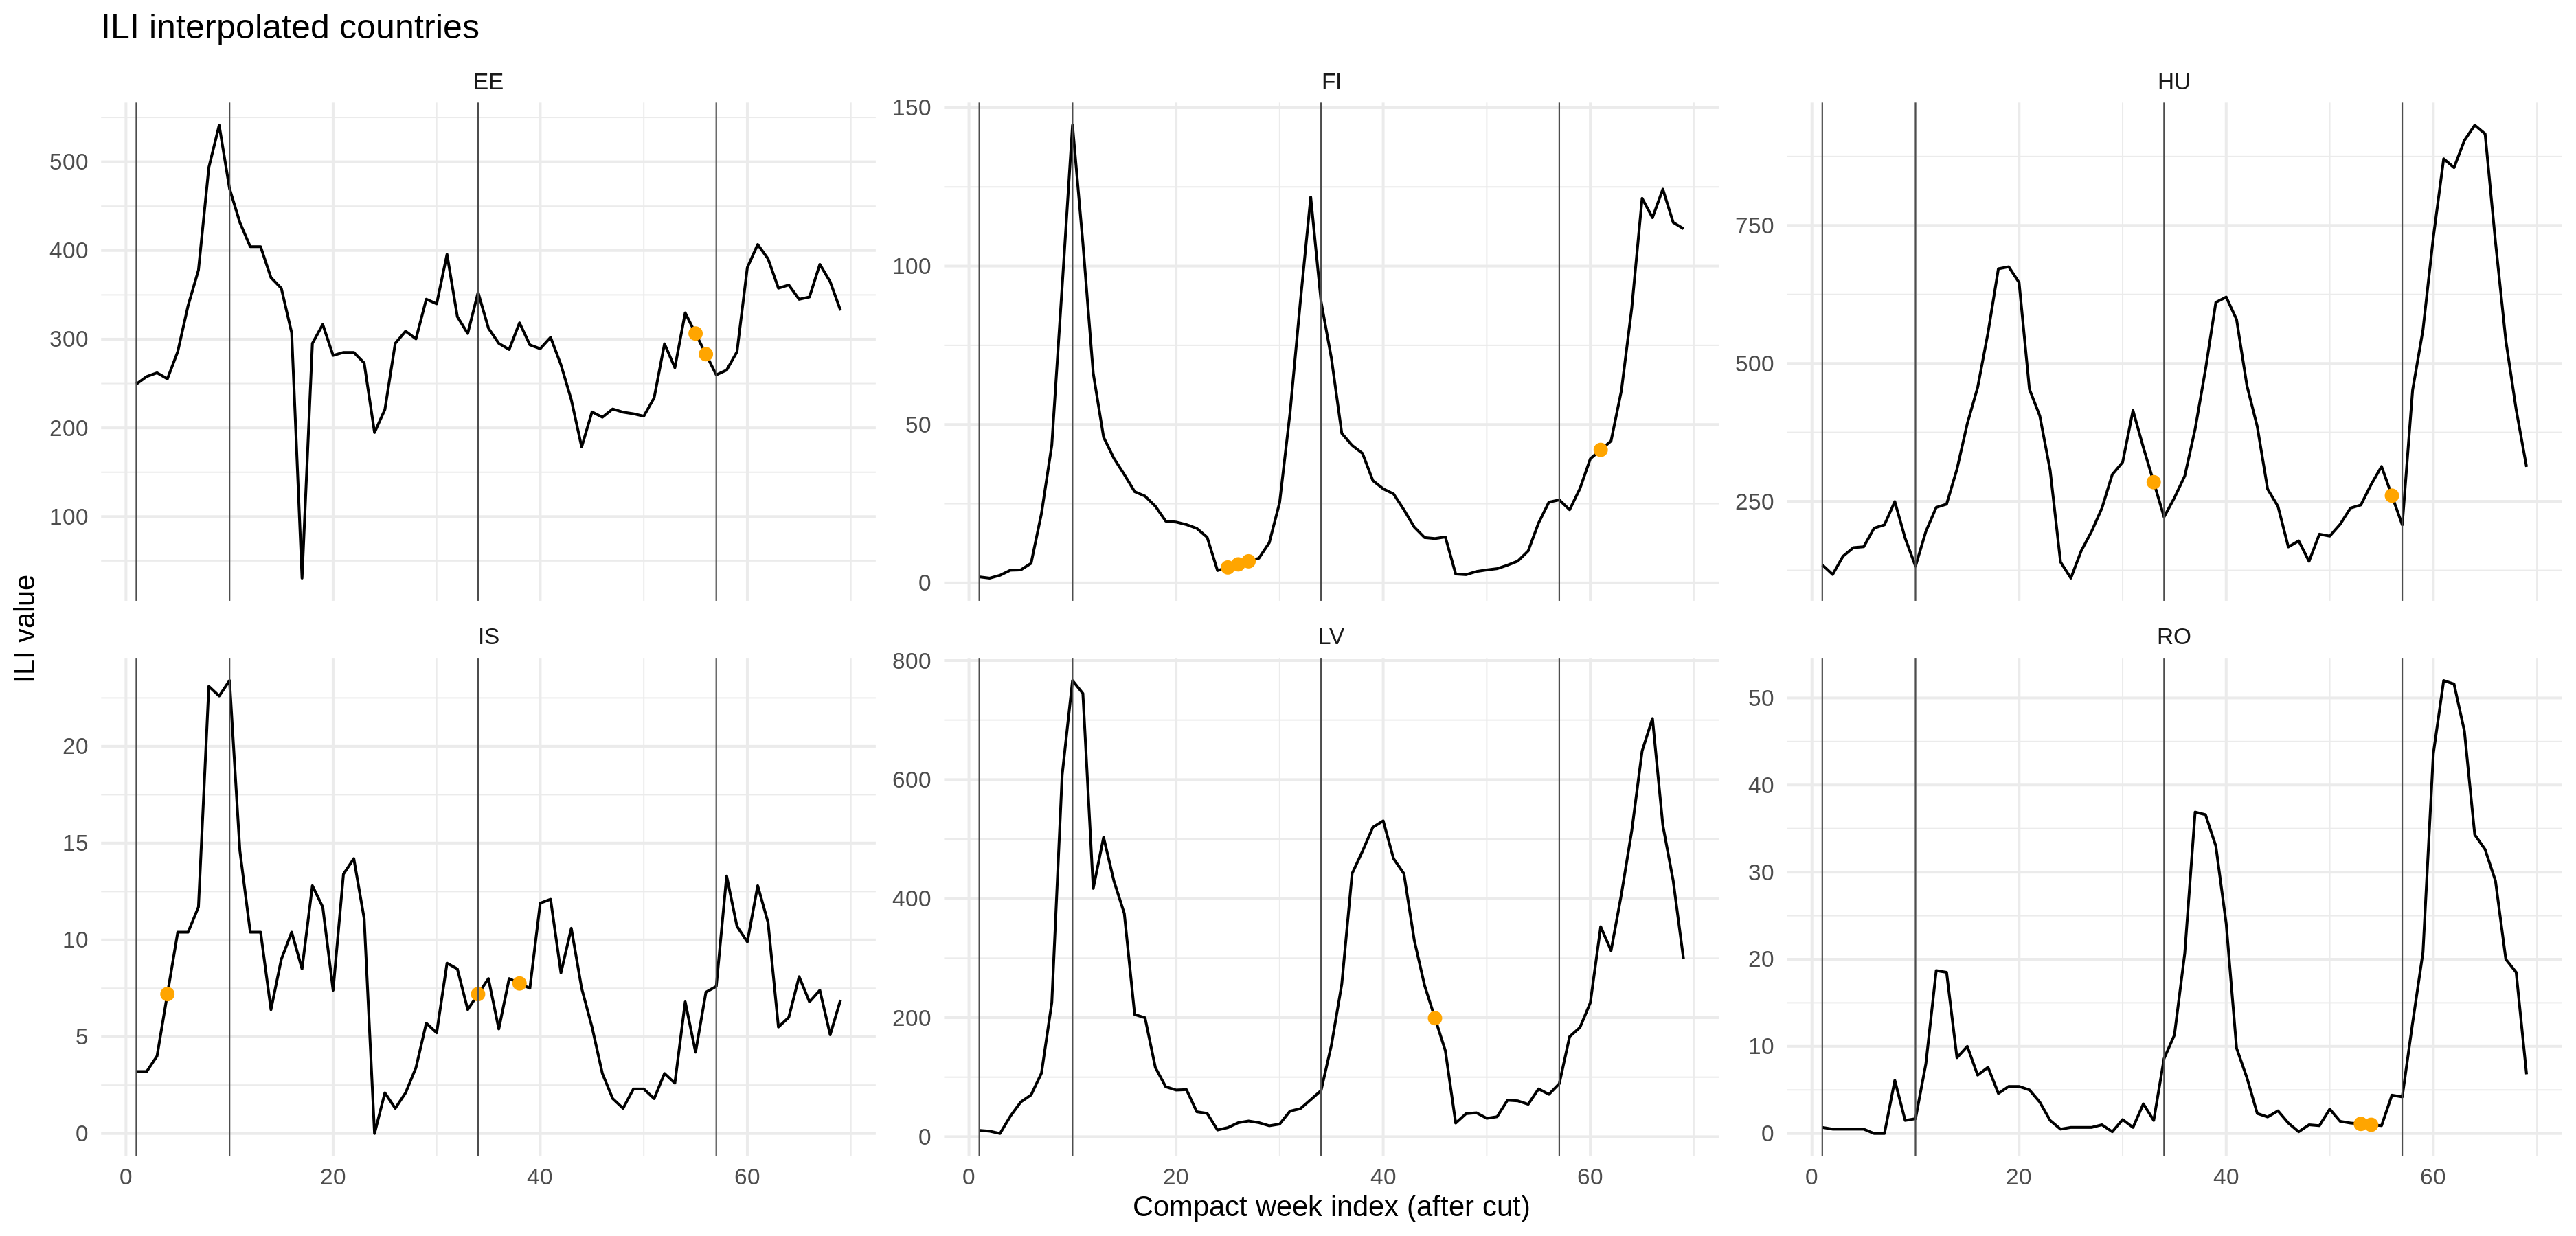

In [80]:
need_interp <- ts_clean %>%
  mutate(interp_flag = !is.na(value_clean) & (is.na(value) | (value == 0 & sus))) %>%
  group_by(location_name) %>%
  summarise(has_interp = any(interp_flag, na.rm = TRUE), .groups = "drop") %>%
  filter(has_interp) %>%
  pull(location_name)


# 2) filter data and prep plotting bits
ts_plot_f <- ts_clean %>%
  filter(location_name %in% need_interp) %>%
  mutate(
    interp_flag = !is.na(value_clean) & (is.na(value) | (value == 0 & sus)),
    year = year(date)
  )

year_lines_f <- ts_plot_f %>%
  group_by(location_name, year) %>%
  summarise(xintercept = first(t_idx), .groups = "drop")

# 3) plot
ggplot(ts_plot_f, aes(x = t_idx, y = value_clean)) +
  geom_line(color = "black", na.rm = FALSE) +

  geom_point(data = filter(ts_plot_f, interp_flag),
              aes(y = value_clean), color = "orange", size = 3.5) +


  geom_vline(data = year_lines_f,
              aes(xintercept = xintercept),
              linetype = "solid", linewidth = 0.5, color = "grey30") +
  facet_wrap(~ location_name, scales = "free_y") +
  labs(
    title = "ILI interpolated countries",
    x = "Compact week index (after cut)",
    y = "ILI value"
  ) +
  theme_minimal(base_size = 20)+
  theme(
    panel.background = element_rect(fill = "white", color = NA),  # grey panel
    plot.background  = element_rect(fill = "white", color = NA),  # grey around panels
  )



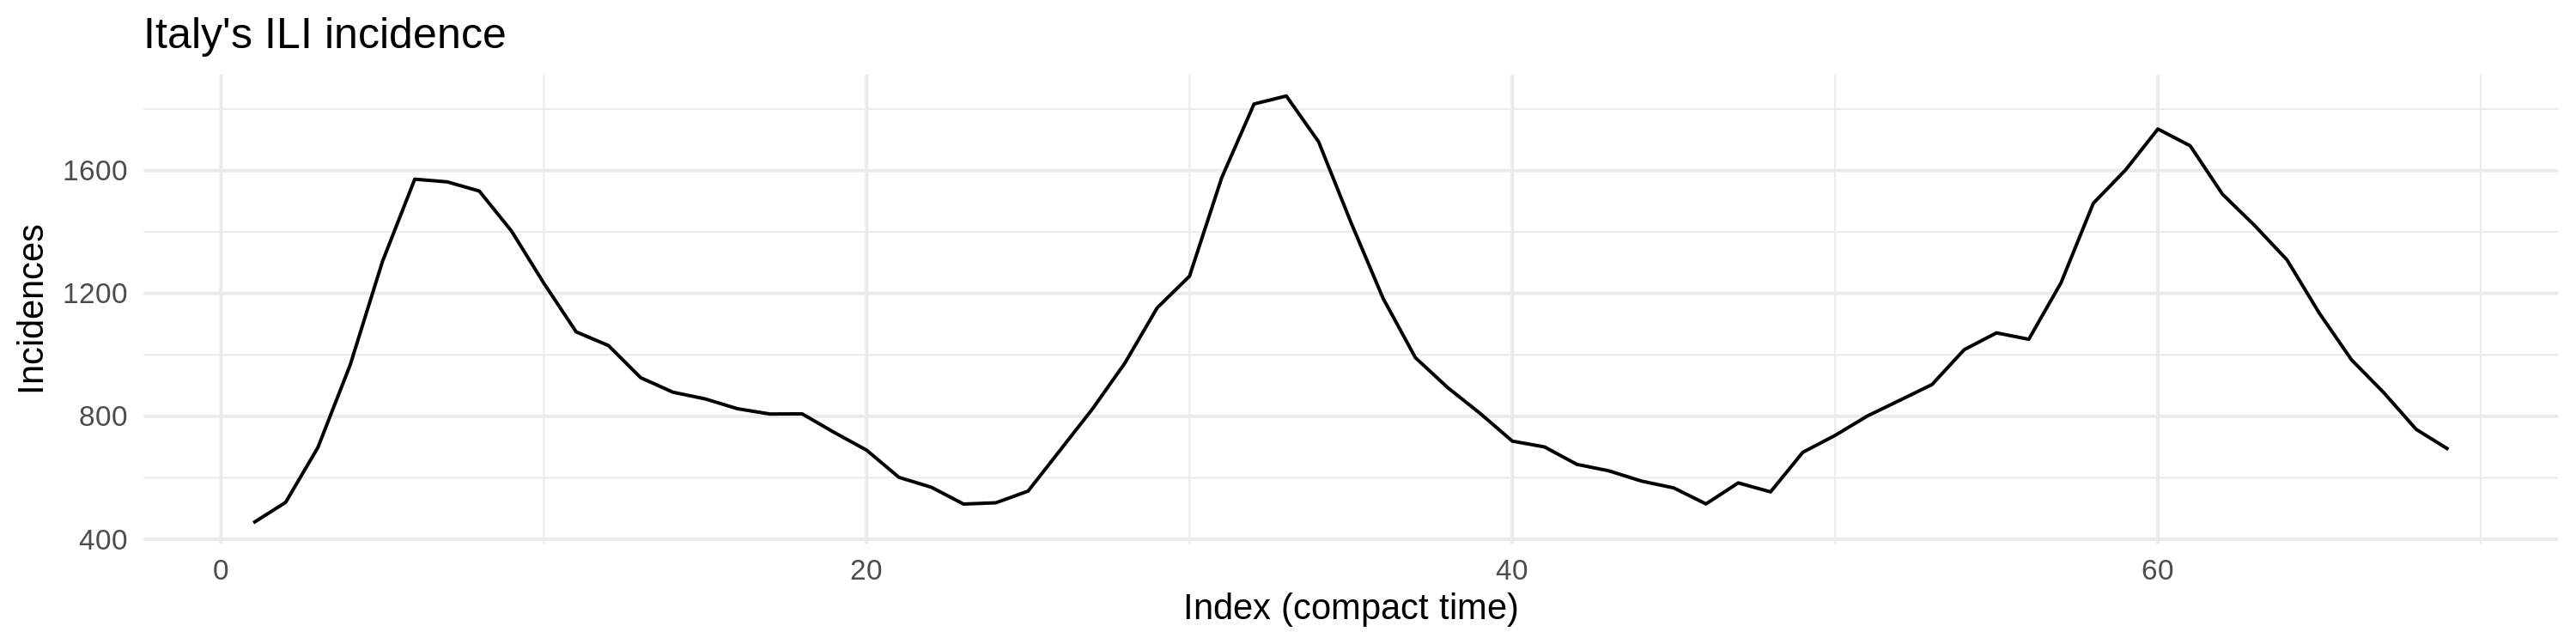

In [92]:
it_idx <- ts_clean %>%
  filter(location_name == "IT") %>%
  arrange(date) %>%
  mutate(t_idx = row_number())     # compact time index

options(repr.plot.width = 20, repr.plot.height = 5, repr.plot.res = 150)

ggplot(it_idx, aes(t_idx, value)) +
  geom_line(linewidth = 0.9, color = "black") +
  labs(title = "Italy's ILI incidence ",
       x = "Index (compact time)", y = "Incidences") +
  theme_minimal(base_size = 20)


In [28]:
ts_clean_wide <- ts_clean %>%
  select(date, location_name, value_clean) %>%
  arrange(date, location_name) %>%
  pivot_wider(
    names_from = location_name,
    values_from = value_clean,
    values_fill = NA_real_ )

In [29]:
head(ts_clean_wide,3)

date       AT     BE   CZ   DK    EE    FI  FR   GR    HR  ⋯ IS  IT    LT 
1 2022-10-30 1274.3 79.9 11.1 131.2 249.4 1.9 68.6 563.2 0.0 ⋯ 3.2 453.6 1.0
2 2022-11-06 1474.3 63.8 15.4 154.5 257.9 1.5 53.2 554.5 0.1 ⋯ 3.2 520.1 1.2
3 2022-11-13 2335.6 81.8 13.0 131.6 262.1 2.4 69.4 744.8 0.2 ⋯ 4.0 698.7 1.4
  LU   LV   MT   NL   PL    RO  SI
1 4800 10.6 5900 16.4 307.8 0.7 0 
2 2800  9.3 6100 23.0 298.4 0.5 0 
3 3400  5.4 8300 19.8 284.5 0.5 1

In [30]:
sum(is.na(ts_clean_wide))

[1] 0

In [31]:
nrow(ts_clean_wide)

[1] 69

## VAR

In [32]:
train_test_split <- function (data_all, h){

  test_length <- h # weeks
  cut_date <-  tail(data_all$date, h)[1]
  train_data <- data_all %>% filter(date < cut_date)
  test_data <- data_all %>% filter(date >= cut_date)

  return (list(train = train_data, test  = test_data))
}

In [97]:
# Potential optimization is to remove the box-cox transformation in a loop
run_big_var <- function (data, p, h, lam=0){

  train_final <- as.matrix(BoxCox(data + 1, lambda = lam))

  var_mod <- constructModel(train_final,
                            p = p,
                            h = h,
                            struct = 'HLAGOO',
                            cv = "Rolling",
                            gran = c(150, 10),
                            verbose = F,
                            rolling_oos = TRUE
                            )

  var_fit <- cv.BigVAR(var_mod)
  pred <- predict(var_fit, n.ahead = h, confint=TRUE)
  pred_final <- round(InvBoxCox(pred, lambda = lam) - 1)
  return (pred_final)
}

In [98]:
growing_window <- function(data, p, h, burn_in_len, lam=0){

index_end <- nrow(data)
country_names <- colnames(data)[-1]

n_iter <- (index_end- h) - burn_in_len + 1
pred_out <- list()
upper_out <- list()
lower_out <- list()

    for (i in burn_in_len:(index_end - h)){

    train_window <- ts(data[1:i, ] %>% select(-date))
    target_date <- data$date[i + h]
    res <- run_big_var(train_window, p=p, h=h)
    pred <- res[1]
    upper <- res[3]
    lower <- res[2]

    # Organize prediction, upper, and lower
    pred_row <- as_tibble_row(setNames(as.list(as.numeric(pred[, 1, drop = TRUE])), country_names))
    pred_row$date <- target_date

    upper_row <- as_tibble_row(setNames(as.list(as.numeric(upper[, 1, drop = TRUE])), country_names))
    upper_row$date <- target_date

    lower_row <- as_tibble_row(setNames(as.list(as.numeric(lower[, 1, drop = TRUE])), country_names))
    lower_row$date <- target_date

    # target_index   <- i + h
    # pred_row$flag  <- ifelse(target_index > (index_end - h), "test", "train")

    pred_out[[i]] <- pred_row
    upper_out[[i]] <- upper_row
    lower_out[[i]] <- lower_row
  }

  pred_df <- bind_rows(pred_out) %>% mutate(horizon = h)
  upper_df <- bind_rows(upper_out) %>% mutate(horizon = h)
  lower_df <- bind_rows(lower_out) %>% mutate(horizon = h)

  return (list(pred = pred_df, upper = upper_df, lower = lower_df))
}

In [99]:
multi_horizon <- function(data, p, h, burn_in_len, lam = 0) {

  pred_all <- list()
  upper_all <- list()
  lower_all <- list()

  for (hh in 1:h) {
    df_res <- growing_window(data, p = p, h = hh, burn_in_len = burn_in_len, lam = lam)

    pred_res <- df_res$pred
    upper_res <- df_res$upper
    lower_res <- df_res$lower

    pred_all[[hh]] <- pred_res %>% mutate(horizon = hh)
    upper_all[[hh]] <- upper_res %>% mutate(horizon = hh)
    lower_all[[hh]] <- lower_res %>% mutate(horizon = hh)
  }

  bind_rows(pred_all)
  bind_rows(upper_all)
  bind_rows(lower_all)

  return (list(pred = pred_all, upper = upper_all, lower = lower_all))
}

In [100]:
hor = 4
lag = 6
res_df <- multi_horizon(ts_clean_wide, p=lag, h=hor, burn_in_len=45)

In [101]:
pred_df <- bind_rows(res_df$pred)
upper_df <- bind_rows(res_df$upper)
lower_df <- bind_rows(res_df$lower)

In [102]:
head(pred_df, 3) #date is the target date

AT   BE  CZ DK  EE  FI FR GR  HR HU  ⋯ LT LU   LV  MT   NL PL  RO SI
1 2241 118 23 146 245 14 70 715 0  220 ⋯ 24 3243 180 6566 27 356 1  3 
2 2024 119 18 153 249 15 62 809 1  167 ⋯ 16 3310 125 6173 26 357 1  3 
3 2248 115 15 152 234  3 85 564 0  179 ⋯  4 3110  15 5335 16 366 0  1 
  date       horizon
1 2024-03-31 1      
2 2024-10-27 1      
3 2024-11-03 1

## Evaluation

In [103]:
eval_score <- function(pred_mat, true_mat) {
  D <- pred_mat - true_mat

  return(tibble(
    region = colnames(pred_mat),
    MAE  = colMeans(abs(D), na.rm = TRUE),
    RMSE = sqrt(colMeans(D^2, na.rm = TRUE)),
  ))
}

In [104]:
head(pred_df,5)

AT   BE  CZ DK  EE  FI FR GR  HR HU  ⋯ LT LU   LV  MT   NL PL  RO SI
1 2241 118 23 146 245 14 70 715 0  220 ⋯ 24 3243 180 6566 27 356 1  3 
2 2024 119 18 153 249 15 62 809 1  167 ⋯ 16 3310 125 6173 26 357 1  3 
3 2248 115 15 152 234  3 85 564 0  179 ⋯  4 3110  15 5335 16 366 0  1 
4 2135  92 16 152 254  3 71 578 0  159 ⋯  6 3232  31 5893 13 351 0  2 
5 2332 120 19 159 248  5 91 666 1  205 ⋯ 10 4087  36 4887 18 373 1  4 
  date       horizon
1 2024-03-31 1      
2 2024-10-27 1      
3 2024-11-03 1      
4 2024-11-10 1      
5 2024-11-17 1

In [105]:
keep_names <- names(ts_clean_wide)

In [106]:
ss <- list()
for (hh in 1:hor) {
  pred_h <- pred_df %>% filter(horizon == hh) %>%
                        select(all_of(keep_names)) %>% arrange(desc(date))


  true_df <- ts_clean_wide %>%
                select(all_of(keep_names)) %>%
                semi_join(pred_h %>% select(date), by = "date") %>% arrange(desc(date))

  pred_mat <- as.matrix(pred_h %>% select (-date))
  true_mat <- as.matrix(true_df %>% select (-date))

  if (identical(names(pred_mat), names(true_mat)) & (all(dim(pred_mat) == dim(true_mat)))){
    print('Calculating the score')
    ss[[hh]] <- eval_score(pred_mat, true_mat) %>% mutate(horizon = hh)
    }
  }
score_full <- bind_rows(ss)

[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"


In [107]:
head(score_full,8)

region MAE       RMSE      horizon
AT AT     441.71250 510.44573 1      
BE BE      84.36667 136.33310 1      
CZ CZ      10.58333  15.29918 1      
DK DK      19.43750  25.92556 1      
EE EE      51.05000  56.02951 1      
FI FI      13.77083  22.49206 1      
FR FR      28.77500  48.46877 1      
GR GR     133.15417 173.19631 1

In [108]:
# IS and WIS experiement

interval_score <- function(y, l, u, alpha) {
  disp  <- (u - l)
  under <- pmax(l - y, 0)          # y < l
  over  <- pmax(y - u, 0)          # y > u
  disp + (2/alpha) * under + (2/alpha) * over
}

# WIS for K intervals + median m (use K=1 for your 95% interval)
wis <- function(y, m, lower_list, upper_list, alphas, w0 = 0.5) {
  stopifnot(length(lower_list) == length(upper_list),
            length(alphas)     == length(lower_list))
  K  <- length(alphas)
  wk <- alphas/2
  term0 <- w0 * abs(y - m)
  acc <- 0
  for (k in seq_len(K)) {
    acc <- acc + wk[k] * interval_score(y, lower_list[[k]], upper_list[[k]], alphas[k])
  }
  (term0 + acc) / (K + 0.5)
}

# Single-interval convenience
IS_one  <- function(y, lwr, upr, alpha) interval_score(y, lwr, upr, alpha)
WIS_one <- function(y, m,  lwr, upr, alpha) wis(y, m, list(lwr), list(upr), c(alpha))


In [109]:
alpha <- 0.05  # 95% interval

pred_long  <- pred_df  %>% pivot_longer(-c(date, horizon), names_to="country", values_to="m")
lower_long <- lower_df %>% pivot_longer(-c(date, horizon), names_to="country", values_to="lwr")
upper_long <- upper_df %>% pivot_longer(-c(date, horizon), names_to="country", values_to="upr")
truth_long <- ts_clean_wide %>% pivot_longer(-date, names_to="country", values_to="y")

scores <- pred_long %>%
  inner_join(lower_long, by = c("date","horizon","country")) %>%
  inner_join(upper_long, by = c("date","horizon","country")) %>%
  inner_join(truth_long, by = c("date","country")) %>%
  mutate(
    IS  = IS_one(y, lwr, upr, alpha),
    WIS = WIS_one(y, m,  lwr, upr, alpha)
  )


In [110]:
# mean by horizon & country
by_hc <- scores %>% group_by(horizon, country) %>%
  summarise(n = n(), IS = mean(IS, na.rm=TRUE), WIS = mean(WIS, na.rm=TRUE), .groups="drop")

# overall by horizon
by_h <- scores %>% group_by(horizon) %>%
  summarise(n = n(), IS = mean(IS, na.rm=TRUE), WIS = mean(WIS, na.rm=TRUE), .groups="drop")


## Plot

In [111]:
sunday_now_past <- function(x, n){
  x   <- as.Date(x)
  mon <- floor_date(x, unit = "week", week_start = 1)
  sun <- mon + days(6)
  rev(seq(from = sun, by = "-1 week", length.out = n))
}

In [112]:
get_plot_df <- function(pred_output, true_data, want = NULL, c=1){

pred_time <- if (!is.null(want)) as.Date(sunday_now_past(want, n = hh)) else tail(true_data$date, hor)
print(pred_time)
pred_list <- list()
 for (hh in 1:hor)
  pred_list[[hh]] <- pred_output %>% filter(horizon == hh, date %in% pred_time[[hh]])
pred_plot_df = bind_rows(pred_list)
pred_plot_df <- pred_plot_df  %>% select(-horizon) %>% pivot_longer(-date, names_to = "country", values_to = "value")


true_plot_df <- tail(true_data, hor)
true_plot_df <- true_plot_df  %>% pivot_longer(-date, names_to = "country", values_to = "value")


last_index <- nrow(true_data)
lag_ts <- true_data %>% slice((last_index - hor - lag*c+ 1L) : (last_index - hor))
lag_ts <- lag_ts %>% pivot_longer(-date, names_to = "country", values_to = "value")

return (list(pred_plot = pred_plot_df, true_plot = true_plot_df, lag_plot = lag_ts))
}

In [113]:
get_plot_df <- function(pred_output, true_data, want = NULL, c = 1){

  # --- build target dates (pred_time) ---
  if (!is.null(want)) {
    # use Sundays of the ISO week containing 'want', plus previous (hor-1) Sundays
    pred_time <- as.Date(sunday_now_past(as.Date(want), n = hor))
  } else {
    pred_time <- tail(sort(unique(true_data$date)), hor)
  }
  pred_time <- sort(pred_time)  # oldest -> newest

  # --- predictions: pick date h for horizon h ---
  pred_list <- lapply(seq_len(hor), function(hh){
    pred_output %>% filter(horizon == hh, date == pred_time[hh])
  })
  pred_plot_df <- bind_rows(pred_list) %>%
    select(-horizon) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  # --- truth aligned to pred_time ---
  true_plot_df <- true_data %>%
    filter(date %in% pred_time) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  # --- lag block: the 'lag*c' dates immediately before the first pred date ---
  min_pred <- min(pred_time)
  lag_len  <- lag * c
  lag_time <- true_data %>%
    filter(date < min_pred) %>%
    arrange(date) %>%
    slice_tail(n = lag_len) %>%
    pull(date)

  lag_ts <- true_data %>%
    filter(date %in% lag_time) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  list(pred_plot = pred_plot_df, true_plot = true_plot_df, lag_plot = lag_ts)
}


In [114]:
wa = "2025-03-30"
pred_plot = get_plot_df(pred_df, ts_clean_wide, want=wa)$pred_plot
true_plot = get_plot_df(pred_df, ts_clean_wide, want=wa)$true_plot
lag_plot = get_plot_df(pred_df, ts_clean_wide, want=wa)$lag_plot

In [115]:
upper_plot = get_plot_df(upper_df, ts_clean_wide, want=wa)$pred_plot
lower_plot = get_plot_df(lower_df, ts_clean_wide, want=wa)$pred_plot

In [116]:
to_long <- function(df, label) df %>% mutate(series = label)

pdat <- bind_rows(
  to_long(true_plot, "true"),
  to_long(pred_plot, "pred"),
  to_long(lag_plot,  "lag"),
  to_long(upper_plot,  "upper"),
  to_long(lower_plot,  "lower")
)

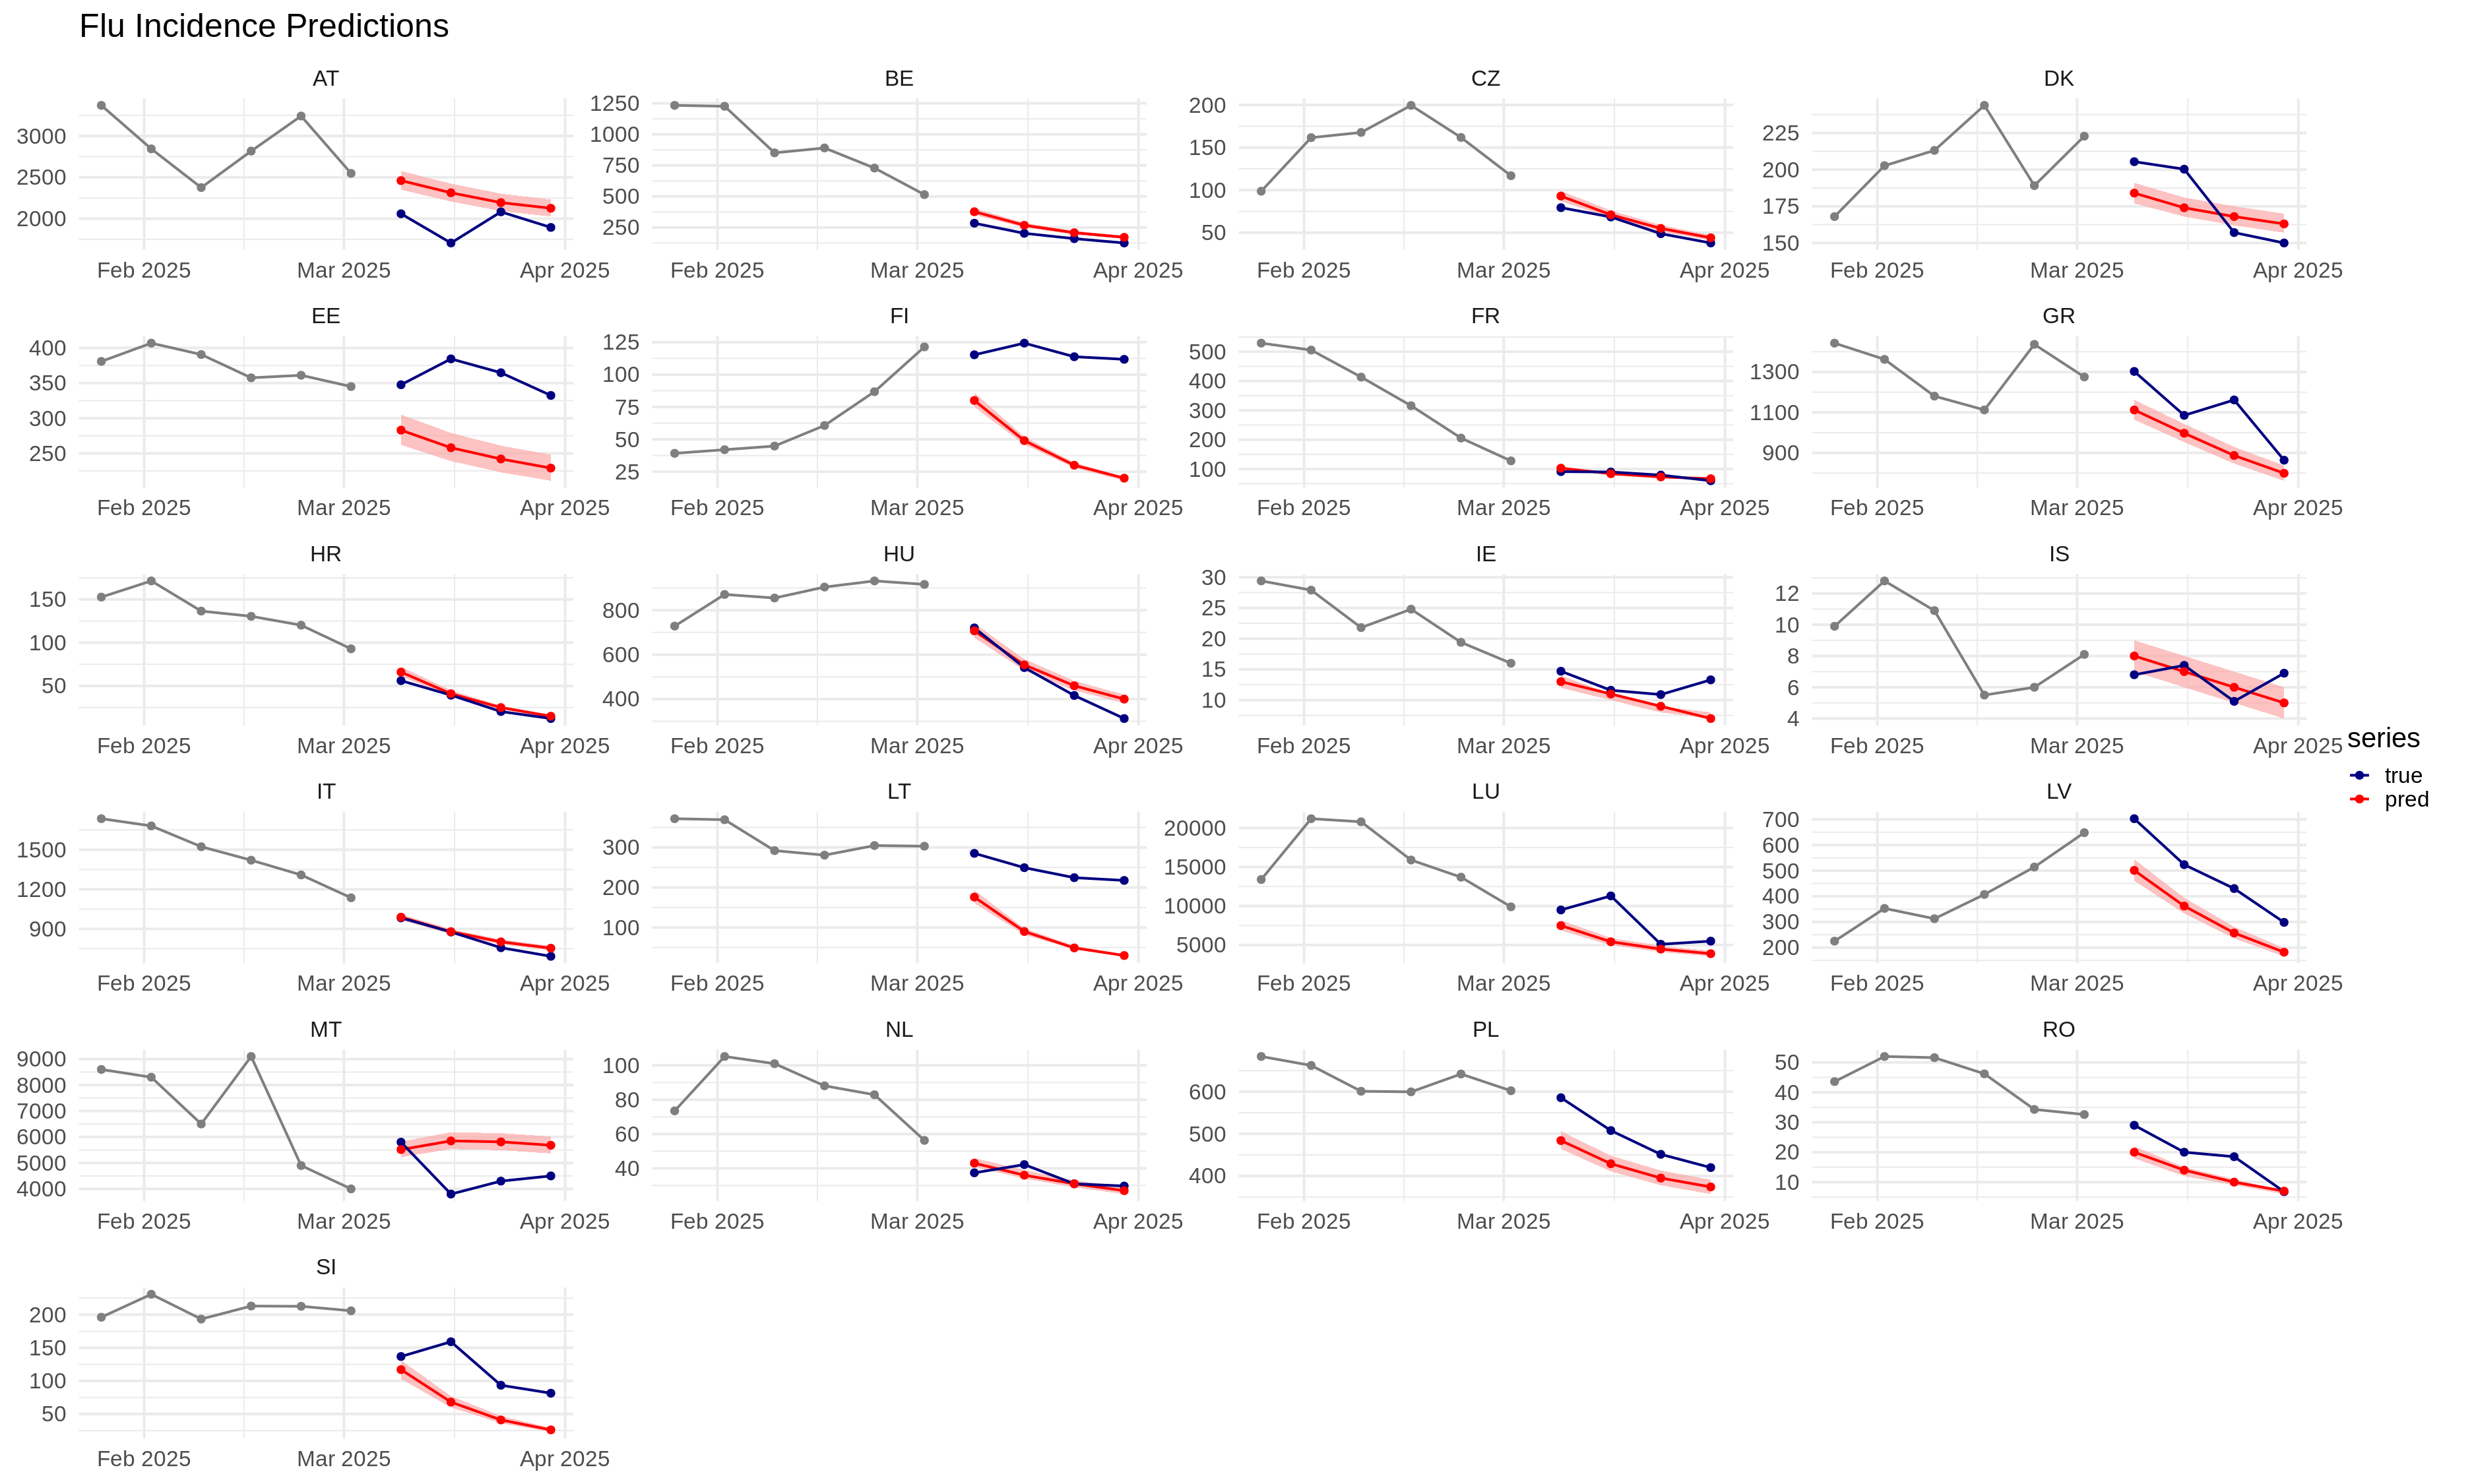

In [118]:
band_df <- pdat %>%
  filter(series %in% c("upper", "lower")) %>%
  pivot_wider(names_from = series, values_from = value) %>%
  filter(!is.na(lower) & !is.na(upper))


plot_data <- pdat %>% filter(!series %in% c("upper", "lower"))


options(repr.plot.width = 25, repr.plot.height = 15, repr.plot.res = 150)

ggplot() +
  geom_ribbon(
    data = band_df,
    aes(x = date, ymin = lower, ymax = upper),
    fill = "#fca7a7", alpha = 0.7
  ) +

  geom_line(data = plot_data, aes(x = date, y = value, color = series)) +
  geom_point(data = plot_data, aes(x = date, y = value, color = series),
             size = 1.8, alpha = 1) +

  facet_wrap(~ country, scales = "free", ncol = 4) +
  labs(title = "Flu Incidence Predictions", x = NULL, y = NULL) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  scale_color_manual(
    breaks = c("true","pred"),
    values = c(true="navy", pred="red")
  )+
  theme_minimal(base_size = 20)

# Save Files

In [63]:
library(googledrive)

In [64]:
write_csv(ts_clean, "ts_clean.csv")

folder <- drive_get("Flu Forecast")
drive_upload(
  media = "ts_clean.csv",
  path  = as_id(folder$id),
  name  = "ts_clean.csv",
  overwrite = TRUE
)


Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=1937162826f8e6f9856e0641c8974081&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHelIxQ3VhTFZzWkxSSy0tTUNndkJNTy1BaTVFRHZFRHZocm0xVllPUElTR1c2aEtBUUtUNXA2bHcxR2IwVGxEdjVZQSIsInN0YXRlIjoiMTkzNzE2MjgyNmY4ZTZmOTg1NmUwNjQxYzg5NzQwODEifQ==


✔ The input `path` resolved to exactly 1 file.

File trashed:

• ts_clean.csv <id: 1bR5zkJV0V9jTISrwwyTjl4fzpNs9o4AX>

Local file:

• ts_clean.csv

Uploaded into Drive file:

• ts_clean.csv <id: 1cQuLH95UiGaDBnE8S8biJKqciJyBTAVP>

With MIME type:

• text/csv



In [126]:
write_csv(marked_df, "ili_marked.csv")

folder <- drive_get("Flu Forecast")
drive_upload(
  media = "ili_marked.csv",
  path  = as_id(folder$id),
  name  = "ili_marked.csv",
  overwrite = TRUE
)


✔ The input `path` resolved to exactly 1 file.

File trashed:

• ili_marked.csv <id: 1eRFWAmQtTisHAayC_g7yG4Y5YVnyoDql>

Local file:

• ili_marked.csv

Uploaded into Drive file:

• ili_marked.csv <id: 169AXJZBy4aN0i3_3o7WOOGnT_O-II2NY>

With MIME type:

• text/csv

